<a href="https://colab.research.google.com/github/akshitkaranam/CZ4042-Project/blob/main/CZ4042%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import essential modules

In [ ]:
import numpy as np
import numpy as np
import pandas as pd
import os
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import tensorflow as tf
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Conv1D, Conv2D,Dropout, MaxPool1D, Bidirectional, LSTM, concatenate, Dense, Softmax, Attention, MaxPool2D, Flatten, Input, Reshape
from tensorflow.keras import callbacks 
from tensorflow.keras import backend as K
!pip install -q git+https://github.com/tensorflow/docs
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Generating CSV for the paths for the various emotions (Run only once)

In [ ]:
Ravdess = "/content/drive/MyDrive/CZ4042/CZ4042 Project/RAVDESS"
Tess = "/content/drive/MyDrive/CZ4042/CZ4042 Project/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data"

In [ ]:
ravdess_directory_list = os.listdir(Ravdess)
print(ravdess_directory_list)
file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    actor = os.listdir(Ravdess + '/'+dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + '/'+ dir + '/' + file)
        
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df

['Actor_10', 'Actor_16', 'Actor_11', 'Actor_03', 'Actor_21', 'Actor_19', 'Actor_17', 'Actor_20', 'Actor_04', 'Actor_18', 'Actor_02', 'Actor_12', 'Actor_22', 'Actor_15', 'Actor_23', 'Actor_14', 'Actor_24', 'Actor_05', 'Actor_13', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_06', 'Actor_01']


,Emotions,Path
0,happy,/content/drive/MyDrive/CZ4042/CZ4042 Project/R...
1,sad,/content/drive/MyDrive/CZ4042/CZ4042 Project/R...
2,happy,/content/drive/MyDrive/CZ4042/CZ4042 Project/R...
3,sad,/content/drive/MyDrive/CZ4042/CZ4042 Project/R...
4,happy,/content/drive/MyDrive/CZ4042/CZ4042 Project/R...
...,...,...
1435,surprise,/content/drive/MyDrive/CZ4042/CZ4042 Project/R...
1436,angry,/content/drive/MyDrive/CZ4042/CZ4042 Project/R...
1437,angry,/content/drive/MyDrive/CZ4042/CZ4042 Project/R...
1438,fear,/content/drive/MyDrive/CZ4042/CZ4042 Project/R...


In [ ]:
tess_directory_list = os.listdir(Tess)
print(tess_directory_list)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + '/'+ dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + '/'+  dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df

['OAF_angry', 'OAF_Fear', 'OAF_disgust', 'OAF_happy', 'OAF_neutral', 'YAF_fear', 'OAF_Sad', 'OAF_Pleasant_surprise', 'YAF_angry', 'YAF_disgust', 'YAF_pleasant_surprised', 'YAF_sad', 'YAF_neutral', 'YAF_happy']


,Emotions,Path
0,angry,/content/drive/MyDrive/CZ4042/CZ4042 Project/T...
1,angry,/content/drive/MyDrive/CZ4042/CZ4042 Project/T...
2,angry,/content/drive/MyDrive/CZ4042/CZ4042 Project/T...
3,angry,/content/drive/MyDrive/CZ4042/CZ4042 Project/T...
4,angry,/content/drive/MyDrive/CZ4042/CZ4042 Project/T...
...,...,...
2795,happy,/content/drive/MyDrive/CZ4042/CZ4042 Project/T...
2796,happy,/content/drive/MyDrive/CZ4042/CZ4042 Project/T...
2797,happy,/content/drive/MyDrive/CZ4042/CZ4042 Project/T...
2798,happy,/content/drive/MyDrive/CZ4042/CZ4042 Project/T...


In [ ]:
data_path = pd.concat([Ravdess_df, Tess_df], axis = 0)
data_path.to_csv("data_path_tess.csv",index=False)
data_path

,Emotions,Path
0,happy,/content/drive/MyDrive/CZ4042/CZ4042 Project/R...
1,sad,/content/drive/MyDrive/CZ4042/CZ4042 Project/R...
2,happy,/content/drive/MyDrive/CZ4042/CZ4042 Project/R...
3,sad,/content/drive/MyDrive/CZ4042/CZ4042 Project/R...
4,happy,/content/drive/MyDrive/CZ4042/CZ4042 Project/R...
...,...,...
2795,happy,/content/drive/MyDrive/CZ4042/CZ4042 Project/T...
2796,happy,/content/drive/MyDrive/CZ4042/CZ4042 Project/T...
2797,happy,/content/drive/MyDrive/CZ4042/CZ4042 Project/T...
2798,happy,/content/drive/MyDrive/CZ4042/CZ4042 Project/T...


# Data Preprocessing and Feature Extraction

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/CZ4042/CZ4042 Project/data_path_tess.csv")
EMOTIONS = {'neutral':1, 'calm':2, 'happy':3, 'sad':4, 'angry':5, 'fear':6, 'disgust':7, 'surprise':0} 
EMOTIONS2 = {1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 0:'surprise'} 

In [ ]:
SAMPLE_RATE = 48000
signals = []
for i, file_path in enumerate(data.Path):
    audio, sample_rate = librosa.load(file_path, duration=3, offset=0.5, sr=SAMPLE_RATE)
    audio_normal = librosa.util.normalize(audio)
    audio_trim, index = librosa.effects.trim(audio_normal, top_db=30)
    signal = np.zeros((int(SAMPLE_RATE*3,)))
    signal[:len(audio_trim)] = audio_trim
    signals.append(signal)
    print("\r Processed {}/{} files".format(i,len(data)),end='')
signals = np.stack(signals,axis=0)

In [ ]:
import shutil
np.save('signals_v1.npy',signals)
colab_link = "/content/signals_v1.npy"
gdrive_link = "/content/drive/MyDrive/CZ4042/CZ4042 Project"
shutil.copy(colab_link, gdrive_link)

'/content/drive/MyDrive/CZ4042/CZ4042 Project/signals_v1.npy'

In [ ]:
emo_num_list = []
for emotion in data.Emotions:
  emo_num_list.append(EMOTIONS[emotion])
data["Emotions"] = emo_num_list

print("number of files is {}".format(len(data)))
data.head()

number of files is 4240


,Emotions,Path
0,3,/content/drive/MyDrive/CZ4042/CZ4042 Project/R...
1,4,/content/drive/MyDrive/CZ4042/CZ4042 Project/R...
2,3,/content/drive/MyDrive/CZ4042/CZ4042 Project/R...
3,4,/content/drive/MyDrive/CZ4042/CZ4042 Project/R...
4,3,/content/drive/MyDrive/CZ4042/CZ4042 Project/R...


In [ ]:
signals = np.load("/content/drive/MyDrive/CZ4042/CZ4042 Project/signals_v1.npy")

In [ ]:
signals.shape

(4240, 144000)

In [ ]:
# manually split based on the number of samples in each emotion, so there is a balanced dataset for testing/validation and training.
X = signals
train_ind,test_ind,val_ind = [],[],[]
X_train,X_val,X_test = [],[],[]
Y_train,Y_val,Y_test = [],[],[]
for emotion in range(len(EMOTIONS)):
    # get the list of indexes for this emotion
    emotion_ind = list(data.loc[data.Emotions==emotion,'Emotions'].index)
    emotion_ind = np.random.permutation(emotion_ind)
    m = len(emotion_ind)
    ind_train = emotion_ind[:int(0.8*m)]
    ind_val = emotion_ind[int(0.8*m):int(0.9*m)]
    ind_test = emotion_ind[int(0.9*m):]
    X_train.append(X[ind_train,:])
    Y_train.append(np.array([emotion]*len(ind_train),dtype=np.int32))
    X_val.append(X[ind_val,:])
    Y_val.append(np.array([emotion]*len(ind_val),dtype=np.int32))
    X_test.append(X[ind_test,:])
    Y_test.append(np.array([emotion]*len(ind_test),dtype=np.int32))
    train_ind.append(ind_train)
    test_ind.append(ind_test)
    val_ind.append(ind_val)
X_train = np.concatenate(X_train,axis=0)
X_val = np.concatenate(X_val,axis=0)
X_test = np.concatenate(X_test,axis=0)
Y_train = np.concatenate(Y_train,axis=0)
Y_val = np.concatenate(Y_val,axis=0)
Y_test = np.concatenate(Y_test,axis=0)
train_ind = np.concatenate(train_ind,axis=0)
val_ind = np.concatenate(val_ind,axis=0)
test_ind = np.concatenate(test_ind,axis=0)
print(f'X_train:{X_train.shape}, Y_train:{Y_train.shape}')
print(f'X_val:{X_val.shape}, Y_val:{Y_val.shape}')
print(f'X_test:{X_test.shape}, Y_test:{Y_test.shape}')
del X

X_train:(3387, 144000), Y_train:(3387,)
X_val:(423, 144000), Y_val:(423,)
X_test:(430, 144000), Y_test:(430,)


In [ ]:
def addAWGN(signal, num_bits=16, augmented_num=2, snr_low=15, snr_high=30): 
    signal_len = len(signal)
    # Generate White Gaussian noise
    noise = np.random.normal(size=(augmented_num, signal_len))
    # Normalize signal and noise
    norm_constant = 2.0**(num_bits-1)
    signal_norm = signal / norm_constant
    noise_norm = noise / norm_constant
    # Compute signal and noise power
    s_power = np.sum(signal_norm ** 2) / signal_len
    n_power = np.sum(noise_norm ** 2, axis=1) / signal_len
    # Random SNR: Uniform [15, 30] in dB
    target_snr = np.random.randint(snr_low, snr_high)
    # Compute K (covariance matrix) for each noise 
    K = np.sqrt((s_power / n_power) * 10 ** (- target_snr / 10))
    K = np.ones((signal_len, augmented_num)) * K  
    # Generate noisy signal
    return signal + K.T * noise

In [ ]:
aug_signals = []
aug_labels = []
for i in range(X_train.shape[0]):
    signal = X_train[i,:]
    augmented_signals = addAWGN(signal)
    for j in range(augmented_signals.shape[0]):
        aug_labels.append(data.loc[i,"Emotions"])
        aug_signals.append(augmented_signals[j,:])
        data = data.append(data.iloc[i], ignore_index=True)
    print("\r Processed {}/{} files".format(i,X_train.shape[0]),end='')
aug_signals = np.stack(aug_signals,axis=0)
X_train = np.concatenate([X_train,aug_signals],axis=0)
aug_labels = np.stack(aug_labels,axis=0)
Y_train = np.concatenate([Y_train,aug_labels])
print('')
print(f'X_train:{X_train.shape}, Y_train:{Y_train.shape}')

 Processed 3386/3387 files

In [ ]:
del aug_signals
del aug_labels

In [ ]:
def getMELspectrogram(audio, sample_rate):
    mel_spec = librosa.feature.melspectrogram(y=audio,
                                              sr=sample_rate
                                             )
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    return mel_spec_db

In [ ]:
def getMFCC(audio):
  frame_length = 2048
  hop_length = 512
  mfcc = librosa.feature.mfcc(audio, sr=48000, n_mfcc=13, hop_length = hop_length)
  return mfcc


In [ ]:
def getRMS(audio):
  frame_length = 2048
  hop_length = 512
  rms = librosa.feature.rms(audio, frame_length=frame_length, hop_length=hop_length)
  return rms


In [ ]:
def getZCR(audio):
  frame_length = 2048
  hop_length = 512
  zcr = librosa.feature.zero_crossing_rate(audio , frame_length=frame_length, hop_length=hop_length, center=True)
  return zcr
  

In [ ]:
mel_train = []
mfcc_train = []
rms_train = []
zcr_train = []
print("Getting features for train set")
for i in range(X_train.shape[0]):
    mel_spectrogram = getMELspectrogram(X_train[i,:], sample_rate=SAMPLE_RATE)
    mfcc = getMFCC(X_train[i,:])
    rms = getRMS(X_train[i,:])
    zcr = getZCR(X_train[i,:])
    mel_train.append(mel_spectrogram)
    mfcc_train.append(mfcc)
    rms_train.append(rms)
    zcr_train.append(zcr)
    print("\r Processed {}/{} files".format(i,X_train.shape[0]),end='')
print('')
mel_train = np.stack(mel_train,axis=0)
mfcc_train = np.stack(mfcc_train,axis=0)
rms_train = np.stack(rms_train,axis=0)
zcr_train = np.stack(zcr_train,axis=0)
print(mel_train.shape)

X_train = np.concatenate((mel_train, mfcc_train,rms_train,zcr_train),axis=2)



np.save('mel_train_v1.npy',mel_train)
import shutil
colab_link = "/content/mel_train_v1.npy"
gdrive_link = "/content/drive/MyDrive/CZ4042/CZ4042 Project"
shutil.copy(colab_link, gdrive_link)

np.save('zcr_train_v1.npy',zcr_train)
colab_link = "/content/zcr_train_v1.npy"
gdrive_link = "/content/drive/MyDrive/CZ4042/CZ4042 Project"
shutil.copy(colab_link, gdrive_link)

np.save('rms_train_v1.npy',rms_train)
colab_link = "/content/rms_train_v1.npy"
gdrive_link = "/content/drive/MyDrive/CZ4042/CZ4042 Project"
shutil.copy(colab_link, gdrive_link)

np.save('mfcc_train_v1.npy',mfcc_train)
colab_link = "/content/mfcc_train_v1.npy"
gdrive_link = "/content/drive/MyDrive/CZ4042/CZ4042 Project"
shutil.copy(colab_link, gdrive_link)

del mel_train
del mfcc_train
del rms_train
del zcr_train



mel_val = []
mfcc_val = []
rms_val = []
zcr_val = []
print("Getting features for val set")
for i in range(X_val.shape[0]):
    mel_spectrogram = getMELspectrogram(X_val[i,:], sample_rate=SAMPLE_RATE)
    mfcc = getMFCC(X_val[i,:])
    rms = getRMS(X_val[i,:])
    zcr = getZCR(X_val[i,:])
    mel_val.append(mel_spectrogram)
    mfcc_val.append(mfcc)
    rms_val.append(rms)
    zcr_val.append(zcr)
    print("\r Processed {}/{} files".format(i,X_val.shape[0]),end='')
print('')
mel_val = np.stack(mel_val,axis=0)
mfcc_val = np.stack(mfcc_val,axis=0)
rms_val = np.stack(rms_val,axis=0)
zcr_val = np.stack(zcr_val,axis=0)
X_val = np.concatenate((mel_val, mfcc_val,rms_val,zcr_val), axis=0)

np.save('mfcc_val_v1.npy',mfcc_val)
import shutil
colab_link = "/content/mfcc_val_v1.npy"
gdrive_link = "/content/drive/MyDrive/CZ4042/CZ4042 Project"
shutil.copy(colab_link, gdrive_link)

np.save('zcr_val_v1.npy',zcr_val)
colab_link = "/content/zcr_val_v1.npy"
gdrive_link = "/content/drive/MyDrive/CZ4042/CZ4042 Project"
shutil.copy(colab_link, gdrive_link)

np.save('rms_val_v1.npy',rms_val)
colab_link = "/content/rms_val_v1.npy"
gdrive_link = "/content/drive/MyDrive/CZ4042/CZ4042 Project"
shutil.copy(colab_link, gdrive_link)

np.save('mel_val_v1.npy',mel_val)
colab_link = "/content/mel_val_v1.npy"
gdrive_link = "/content/drive/MyDrive/CZ4042/CZ4042 Project"
shutil.copy(colab_link, gdrive_link)

del mel_val
del mfcc_val
del rms_val
del zcr_val


mel_test = []
mfcc_test = []
rms_test = []
zcr_test = []
print("Getting features for test set")
for i in range(X_test.shape[0]):
    mel_spectrogram = getMELspectrogram(X_test[i,:], sample_rate=SAMPLE_RATE)
    mfcc = getMFCC(X_test[i,:])
    rms = getRMS(X_test[i,:])
    zcr = getZCR(X_test[i,:])
    mel_test.append(mel_spectrogram)
    mfcc_test.append(mfcc)
    rms_test.append(rms)
    zcr_test.append(zcr)
    print("\r Processed {}/{} files".format(i,X_test.shape[0]),end='')
print('')
mel_test = np.stack(mel_test,axis=0)
mfcc_test = np.stack(mfcc_test,axis=0)
rms_test = np.stack(rms_test,axis=0)
zcr_test = np.stack(zcr_test,axis=0)
X_test = np.concatenate((mel_test, mfcc_test,rms_test,zcr_test), axis=0)

np.save('mel_test_v1.npy',mel_test)
import shutil
colab_link = "/content/mel_test_v1.npy"
gdrive_link = "/content/drive/MyDrive/CZ4042/CZ4042 Project"
shutil.copy(colab_link, gdrive_link)

np.save('zcr_test_v1.npy',zcr_test)
colab_link = "/content/zcr_test_v1.npy"
gdrive_link = "/content/drive/MyDrive/CZ4042/CZ4042 Project"
shutil.copy(colab_link, gdrive_link)

np.save('rms_test_v1.npy',rms_test)
colab_link = "/content/rms_test_v1.npy"
gdrive_link = "/content/drive/MyDrive/CZ4042/CZ4042 Project"
shutil.copy(colab_link, gdrive_link)

np.save('mel_test_v1.npy',mel_test)
colab_link = "/content/mel_test_v1.npy"
gdrive_link = "/content/drive/MyDrive/CZ4042/CZ4042 Project"
shutil.copy(colab_link, gdrive_link)

del mel_test
del mfcc_test
del rms_test
del zcr_test

print(f'X_train:{X_train.shape}, Y_train:{Y_train.shape}')
print(f'X_val:{X_val.shape}, Y_val:{Y_val.shape}')
print(f'X_test:{X_test.shape}, Y_test:{Y_test.shape}')

In [ ]:
mel_train = np.load('/content/drive/MyDrive/CZ4042/CZ4042 Project/mel_train_v1_3.npy')
mfcc_train = np.load('/content/drive/MyDrive/CZ4042/CZ4042 Project/mfcc_train_v1_2.npy')
rms_train = np.load('/content/drive/MyDrive/CZ4042/CZ4042 Project/rms_train_v1_2.npy')
zcr_train = np.load('/content/drive/MyDrive/CZ4042/CZ4042 Project/zcr_train_v1_2.npy')



In [ ]:
f_rms = np.asarray(rms_train).astype('float32')
f_rms = np.swapaxes(f_rms,1,2)
f_zcr = np.asarray(zcr_train).astype('float32')
f_zcr = np.swapaxes(f_zcr,1,2)
f_mfccs = np.asarray(mfcc_train).astype('float32')
f_mfccs = np.swapaxes(f_mfccs,1,2)
f_mel = np.asarray(mel_train).astype('float32')
f_mel= np.swapaxes(f_mel,1,2)

print('ZCR shape:',f_zcr.shape)
print('RMS shape:',f_rms.shape)
print('MFCCs shape:',f_mfccs.shape)
print('MEL shape:',f_mel.shape)

ZCR shape: (10161, 282, 1)
RMS shape: (10161, 282, 1)
MFCCs shape: (10161, 282, 13)
MEL shape: (10161, 282, 128)


In [ ]:
X_train = np.concatenate((f_zcr, f_rms, f_mfccs,f_mel), axis=2)
Y_train = np.load('/content/drive/MyDrive/CZ4042/CZ4042 Project/Y_train_final_v1.npy')


In [ ]:
mel_val = np.load('/content/drive/MyDrive/CZ4042/CZ4042 Project/mel_val_v1_3.npy')
mfcc_val = np.load('/content/drive/MyDrive/CZ4042/CZ4042 Project/mfcc_val_v1_2.npy')
rms_val = np.load('/content/drive/MyDrive/CZ4042/CZ4042 Project/rms_val_v1_2.npy')
zcr_val = np.load('/content/drive/MyDrive/CZ4042/CZ4042 Project/zcr_val_v1_2.npy')

In [ ]:
f_rms = np.asarray(rms_val).astype('float32')
f_rms = np.swapaxes(f_rms,1,2)
f_zcr = np.asarray(zcr_val).astype('float32')
f_zcr = np.swapaxes(f_zcr,1,2)
f_mfccs = np.asarray(mfcc_val).astype('float32')
f_mfccs = np.swapaxes(f_mfccs,1,2)
f_mel = np.asarray(mel_val).astype('float32')
f_mel= np.swapaxes(f_mel,1,2)

print('ZCR shape:',f_zcr.shape)
print('RMS shape:',f_rms.shape)
print('MFCCs shape:',f_mfccs.shape)
print('MEL shape:',f_mel.shape)

ZCR shape: (423, 282, 1)
RMS shape: (423, 282, 1)
MFCCs shape: (423, 282, 13)
MEL shape: (423, 282, 128)


In [ ]:
X_val = np.concatenate((f_zcr, f_rms, f_mfccs,f_mel), axis=2)
Y_val = np.load('/content/drive/MyDrive/CZ4042/CZ4042 Project/Y_val_final_v1.npy')

In [ ]:
mel_test = np.load('/content/drive/MyDrive/CZ4042/CZ4042 Project/mel_test_v1_3.npy')
mfcc_test = np.load('/content/drive/MyDrive/CZ4042/CZ4042 Project/mfcc_test_v1_2.npy')
rms_test = np.load('/content/drive/MyDrive/CZ4042/CZ4042 Project/rms_test_v1_2.npy')
zcr_test = np.load('/content/drive/MyDrive/CZ4042/CZ4042 Project/zcr_test_v1_2.npy')

In [ ]:
f_rms = np.asarray(rms_test).astype('float32')
f_rms = np.swapaxes(f_rms,1,2)
f_zcr = np.asarray(zcr_test).astype('float32')
f_zcr = np.swapaxes(f_zcr,1,2)
f_mfccs = np.asarray(mfcc_test).astype('float32')
f_mfccs = np.swapaxes(f_mfccs,1,2)
f_mel = np.asarray(mel_test).astype('float32')
f_mel= np.swapaxes(f_mel,1,2)

print('ZCR shape:',f_zcr.shape)
print('RMS shape:',f_rms.shape)
print('MFCCs shape:',f_mfccs.shape)
print('MEL shape:',f_mel.shape)

ZCR shape: (430, 282, 1)
RMS shape: (430, 282, 1)
MFCCs shape: (430, 282, 13)
MEL shape: (430, 282, 128)


In [ ]:
X_test = np.concatenate((f_zcr, f_rms, f_mfccs,f_mel), axis=2)
Y_test = np.load('/content/drive/MyDrive/CZ4042/CZ4042 Project/Y_test_final_v1.npy')

In [ ]:
print("X_train: " + str(X_train.shape ))
print("Y_train: " + str(Y_train.shape ))
print("X_val: " + str(X_val.shape ))
print("Y_val: " + str(Y_val.shape ))
print("X_test: " + str(X_test.shape ))
print("Y_test: " + str(Y_test.shape ))

X_train: (10161, 282, 143)
Y_train: (10161,)
X_val: (423, 282, 143)
Y_val: (423,)
X_test: (430, 282, 143)
Y_test: (430,)


In [ ]:
import shutil
np.save('X_train_final_v2.npy',X_train)
colab_link = "/content/X_train_final_v2.npy"
gdrive_link = "/content/drive/MyDrive/CZ4042/CZ4042 Project"
shutil.copy(colab_link, gdrive_link)

np.save('Y_train_final_v2.npy',Y_train)
colab_link = "/content/Y_train_final_v2.npy"
gdrive_link = "/content/drive/MyDrive/CZ4042/CZ4042 Project"
shutil.copy(colab_link, gdrive_link)

np.save('X_test_final_v2.npy',X_test)
colab_link = "/content/X_test_final_v2.npy"
gdrive_link = "/content/drive/MyDrive/CZ4042/CZ4042 Project"
shutil.copy(colab_link, gdrive_link)

np.save('Y_test_final_v2.npy',Y_test)
colab_link = "/content/Y_test_final_v2.npy"
gdrive_link = "/content/drive/MyDrive/CZ4042/CZ4042 Project"
shutil.copy(colab_link, gdrive_link)


np.save('X_val_final_v2.npy',X_val)
colab_link = "/content/X_val_final_v2.npy"
gdrive_link = "/content/drive/MyDrive/CZ4042/CZ4042 Project"
shutil.copy(colab_link, gdrive_link)

np.save('Y_val_final_v2.npy',Y_val)
colab_link = "/content/Y_val_final_v2.npy"
gdrive_link = "/content/drive/MyDrive/CZ4042/CZ4042 Project"
shutil.copy(colab_link, gdrive_link)


'/content/drive/MyDrive/CZ4042/CZ4042 Project/Y_val_final_v2.npy'

# Load Data

### Using Mel_spectogram

In [ ]:
import numpy as np

In [ ]:
X_train = np.load('/content/drive/MyDrive/CZ4042/CZ4042 Project/mel_train_v1_3.npy')
Y_train = np.load('/content/drive/MyDrive/CZ4042/CZ4042 Project/Y_train_final_v2.npy')

# f_X_train = np.asarray(X_train).astype('float32')
# X_train = np.array(np.swapaxes(f_X_train,1,2))

In [ ]:
Y_val = np.load('/content/drive/MyDrive/CZ4042/CZ4042 Project/Y_val_final_v2.npy')
X_val = np.load('/content/drive/MyDrive/CZ4042/CZ4042 Project/mel_val_v1_3.npy')

# X_val = np.asarray(X_val).astype('float32')
# X_val = np.swapaxes(X_val,1,2)
# X_val.shape

In [ ]:
Y_test = np.load('/content/drive/MyDrive/CZ4042/CZ4042 Project/Y_test_final_v2.npy')
X_test = np.load('/content/drive/MyDrive/CZ4042/CZ4042 Project/mel_test_v1_3.npy')

# X_test = np.asarray(X_test).astype('float32')
# X_test = np.swapaxes(X_test,1,2)

### Using MFCC + RMS + ZCR (FINAL)

In [ ]:
import numpy as np

In [ ]:
mfcc = np.load('/content/drive/MyDrive/CZ4042/CZ4042 Project/mfcc_train_v1_2.npy')
rms = np.load('/content/drive/MyDrive/CZ4042/CZ4042 Project/rms_train_v1_2.npy')
zcr = np.load('/content/drive/MyDrive/CZ4042/CZ4042 Project/zcr_train_v1_2.npy')

f_rms = np.asarray(rms).astype('float32')
f_rms = np.swapaxes(f_rms,1,2)
f_zcr = np.asarray(zcr).astype('float32')
f_zcr = np.swapaxes(f_zcr,1,2)
f_mfccs = np.asarray(mfcc).astype('float32')
f_mfccs = np.swapaxes(f_mfccs,1,2)
X_train = np.concatenate((f_zcr, f_rms, f_mfccs), axis=2)
Y_train = np.load('/content/drive/MyDrive/CZ4042/CZ4042 Project/Y_train_final_v2.npy')

del mfcc
del rms
del zcr
del f_rms
del f_mfccs
del f_zcr


In [ ]:
Y_val = np.load('/content/drive/MyDrive/CZ4042/CZ4042 Project/Y_val_final_v2.npy')
mfcc = np.load('/content/drive/MyDrive/CZ4042/CZ4042 Project/mfcc_val_v1_2.npy')
rms = np.load('/content/drive/MyDrive/CZ4042/CZ4042 Project/rms_val_v1_2.npy')
zcr = np.load('/content/drive/MyDrive/CZ4042/CZ4042 Project/zcr_val_v1_2.npy')

f_rms = np.asarray(rms).astype('float32')
f_rms = np.swapaxes(f_rms,1,2)
f_zcr = np.asarray(zcr).astype('float32')
f_zcr = np.swapaxes(f_zcr,1,2)
f_mfccs = np.asarray(mfcc).astype('float32')
f_mfccs = np.swapaxes(f_mfccs,1,2)
X_val = np.concatenate((f_zcr, f_rms, f_mfccs), axis=2)

del mfcc
del rms
del zcr
del f_rms
del f_mfccs
del f_zcr


In [ ]:
Y_test = np.load('/content/drive/MyDrive/CZ4042/CZ4042 Project/Y_test_final_v2.npy')
mfcc = np.load('/content/drive/MyDrive/CZ4042/CZ4042 Project/mfcc_test_v1_2.npy')
rms = np.load('/content/drive/MyDrive/CZ4042/CZ4042 Project/rms_test_v1_2.npy')
zcr = np.load('/content/drive/MyDrive/CZ4042/CZ4042 Project/zcr_test_v1_2.npy')

f_rms = np.asarray(rms).astype('float32')
f_rms = np.swapaxes(f_rms,1,2)
f_zcr = np.asarray(zcr).astype('float32')
f_zcr = np.swapaxes(f_zcr,1,2)
f_mfccs = np.asarray(mfcc).astype('float32')
f_mfccs = np.swapaxes(f_mfccs,1,2)
X_test = np.concatenate((f_zcr, f_rms, f_mfccs), axis=2)

del mfcc
del rms
del zcr
del f_rms
del f_mfccs
del f_zcr

### Data Preprocess

In [ ]:
# For 2D Convultional Layers
X_train = np.expand_dims(X_train,1)
X_val = np.expand_dims(X_val,1)
X_test = np.expand_dims(X_test,1)

In [ ]:
X_train.shape

(10161, 1, 282, 15)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
Y_train_new = encoder.fit_transform(np.array(Y_train).reshape(-1,1)).toarray()
print(encoder.categories_)
encoder = OneHotEncoder()
Y_test_new = encoder.fit_transform(np.array(Y_test).reshape(-1,1)).toarray()
print(encoder.categories_)
Y_val_new = encoder.fit_transform(np.array(Y_val).reshape(-1,1)).toarray()
print(encoder.categories_)

[array([0, 1, 2, 3, 4, 5, 6, 7])]
[array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)]
[array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)]


# Models Exploration

### LSTM

In [ ]:
# Initializing the model

model_in = Input(X_train.shape[1:4])
squeezed = K.squeeze(model_in, 1)
lstm1 = LSTM(64, return_sequences = True) (squeezed)
lstm2 = LSTM(64, return_sequences = True) (lstm1)
output = Dense(8, activation = 'softmax') (lstm2)
lstm_2_model = Model(inputs=[model_in],outputs=[output], name = "lstm_model")
print(lstm_2_model.summary())

batch_size = 32

checkpoint_path_mixed = '/content/drive/My Drive/CZ4042/CZ4042 Project/lstm_vanilla_mixed_2_best_weights.hdf5'

mcp_save = callbacks.ModelCheckpoint(checkpoint_path_mixed, save_best_only=True,
                           monitor='val_categorical_accuracy',
                           mode='max')
rlrop = callbacks.ReduceLROnPlateau(monitor='val_categorical_accuracy', 
                                    factor=0.1, patience=100)
                             
lstm_2_model.compile(loss='categorical_crossentropy', 
                optimizer='RMSProp', 
                metrics=['categorical_accuracy'])

history = lstm_2_model.fit(X_train, Y_train_new, 
                      epochs=100, batch_size = batch_size, 
                      validation_data = (X_val, Y_val_new), 
                      callbacks = [mcp_save, rlrop])
lstm_2_model.load_weights(checkpoint_path_mixed)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 282, 64)           20480     
                                                                 
 lstm_22 (LSTM)              (None, 64)                33024     
                                                                 
 dense_33 (Dense)            (None, 8)                 520       
                                                                 
Total params: 54,024
Trainable params: 54,024
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
442/442 [==============================] - 16s 24ms/step - loss: 1.9817 - categorical_accuracy: 0.2063 - val_loss: 1.6898 - val_categorical_accuracy: 0.3924 - lr: 0.0010
Epoch 2/100
442/442 [==============================] - 9s 20ms/step - loss: 1.7840 - categorical_accuracy: 0.2979 - val_loss: 1

#### Mel

In [ ]:
history = lstm_model.fit(X_train, Y_train_new, 
                      epochs=50, batch_size = batch_size, 
                      validation_data = (X_val, Y_val_new), 
                      callbacks = [mcp_save, rlrop])

Epoch 1/50
636/636 [==============================] - 26s 24ms/step - loss: 1.9402 - categorical_accuracy: 0.2461 - val_loss: 1.6259 - val_categorical_accuracy: 0.4232 - lr: 1.0000e-05
Epoch 2/50
636/636 [==============================] - 9s 14ms/step - loss: 1.8012 - categorical_accuracy: 0.3236 - val_loss: 1.4231 - val_categorical_accuracy: 0.5296 - lr: 1.0000e-05
Epoch 3/50
636/636 [==============================] - 7s 10ms/step - loss: 1.6877 - categorical_accuracy: 0.3681 - val_loss: 1.2884 - val_categorical_accuracy: 0.5934 - lr: 1.0000e-05
Epoch 4/50
636/636 [==============================] - 7s 10ms/step - loss: 1.5942 - categorical_accuracy: 0.4098 - val_loss: 1.1952 - val_categorical_accuracy: 0.6430 - lr: 1.0000e-05
Epoch 5/50
636/636 [==============================] - 6s 10ms/step - loss: 1.5176 - categorical_accuracy: 0.4393 - val_loss: 1.1161 - val_categorical_accuracy: 0.6643 - lr: 1.0000e-05
Epoch 6/50
636/636 [==============================] - 6s 10ms/step - loss: 1.44

In [ ]:
results_lstm = lstm_model.evaluate(X_test, Y_test_new, batch_size=128)

4/4 [==============================] - 0s 14ms/step - loss: 0.7848 - categorical_accuracy: 0.7605


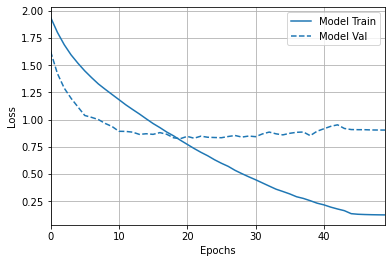

In [ ]:
histories = {}
histories['model'] = history
plotter = tfdocs.plots.HistoryPlotter(metric = 'loss')
plotter.plot(histories)


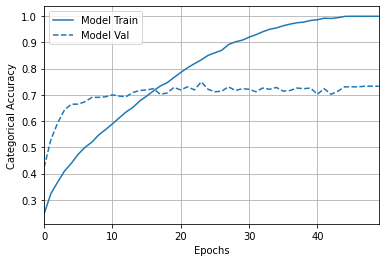

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'categorical_accuracy')
plotter.plot(histories)

In [ ]:
lstm_model.load_weights('/content/drive/My Drive/CZ4042/CZ4042 Project/lstm_vanilla_best_weights.hdf5')
# Re-evaluate the model
loss, acc = lstm_model.evaluate(X_test, Y_test_new, verbose=2)

14/14 - 0s - loss: 0.7567 - categorical_accuracy: 0.7442 - 113ms/epoch - 8ms/step


#### RMS + ZCR + MFCC (FINAL)

In [ ]:
history = lstm_model.fit(X_train, Y_train_new, 
                      epochs=50, batch_size = batch_size, 
                      validation_data = (X_val, Y_val_new), 
                      callbacks = [mcp_save, rlrop])

Epoch 1/50
636/636 [==============================] - 12s 7ms/step - loss: 2.0597 - categorical_accuracy: 0.1611 - val_loss: 1.9816 - val_categorical_accuracy: 0.2364 - lr: 1.0000e-05
Epoch 2/50
636/636 [==============================] - 3s 5ms/step - loss: 1.9712 - categorical_accuracy: 0.2315 - val_loss: 1.9004 - val_categorical_accuracy: 0.2931 - lr: 1.0000e-05
Epoch 3/50
636/636 [==============================] - 3s 5ms/step - loss: 1.9125 - categorical_accuracy: 0.2814 - val_loss: 1.8253 - val_categorical_accuracy: 0.3428 - lr: 1.0000e-05
Epoch 4/50
636/636 [==============================] - 3s 5ms/step - loss: 1.8580 - categorical_accuracy: 0.3176 - val_loss: 1.7552 - val_categorical_accuracy: 0.4066 - lr: 1.0000e-05
Epoch 5/50
636/636 [==============================] - 3s 5ms/step - loss: 1.8052 - categorical_accuracy: 0.3441 - val_loss: 1.6848 - val_categorical_accuracy: 0.4492 - lr: 1.0000e-05
Epoch 6/50
636/636 [==============================] - 3s 5ms/step - loss: 1.7547 - c

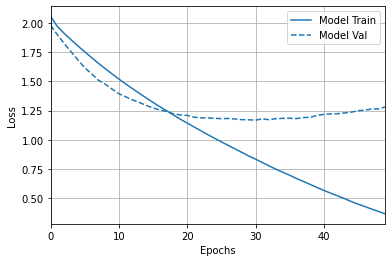

In [ ]:
histories = {}
histories['model'] = history
plotter = tfdocs.plots.HistoryPlotter(metric = 'loss')
plotter.plot(histories)


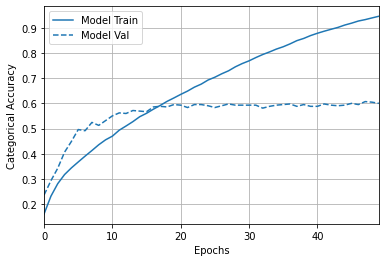

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'categorical_accuracy')
plotter.plot(histories)

In [ ]:
lstm_model.load_weights('/content/drive/My Drive/CZ4042/CZ4042 Project/lstm_vanilla_mixed_best_weights.hdf5')
# Re-evaluate the model
loss, acc = lstm_model.evaluate(X_test, Y_test_new, verbose=2)

14/14 - 0s - loss: 1.1992 - categorical_accuracy: 0.6000 - 63ms/epoch - 4ms/step


### LSTM + Attention

In [ ]:
from keras.layers import Layer
from keras import backend as K
# Add attention layer to the deep learning network
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)
 
    def build(self,input_shape):
        self.W=self.add_weight(name='attention_weight', shape=(input_shape[-1],1), 
                               initializer='random_normal', trainable=True)
        self.b=self.add_weight(name='attention_bias', shape=(input_shape[1],1), 
                               initializer='zeros', trainable=True)        
        super(attention, self).build(input_shape)
 
    def call(self,x):
        # Alignment scores. Pass them through tanh function
        e = K.tanh(K.dot(x,self.W)+self.b)
        # Remove dimension of size 1
        e = K.squeeze(e, axis=-1)   
        # Compute the weights
        alpha = K.softmax(e)
        # Reshape to tensorFlow format
        alpha = K.expand_dims(alpha, axis=-1)
        # Compute the context vector
        context = x * alpha
        context = K.sum(context, axis=1)
        return context

Model: "lstm_model_attention"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 1, 282, 15)]      0         
                                                                 
 tf.compat.v1.squeeze_15 (TF  (None, 282, 15)          0         
 OpLambda)                                                       
                                                                 
 lstm_34 (LSTM)              (None, 282, 64)           20480     
                                                                 
 attention_9 (attention)     (None, 64)                346       
                                                                 
 dense_45 (Dense)            (None, 8)                 520       
                                                                 
Total params: 21,346
Trainable params: 21,346
Non-trainable params: 0
__________________________________________

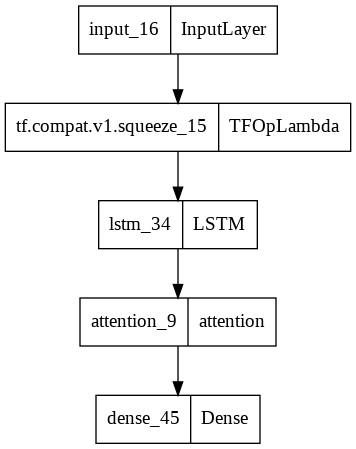

In [ ]:
# Initializing the model
model_in = Input(X_train.shape[1:4])
squeezed = K.squeeze(model_in, 1)
lstm1 = LSTM(64, return_sequences = True) (squeezed)
attention_layer = attention() (lstm1)
output3 = Dense(8, activation = 'softmax') (attention_layer)


lstm_model_attention = Model(inputs=[model_in],outputs=[output3], name = "lstm_model_attention")
print(lstm_model_attention.summary())

batch_size = 256
checkpoint_path = '/content/drive/My Drive/CZ4042/CZ4042 Project/lstm_attention_best_weights.hdf5'
checkpoint_path = '/content/drive/My Drive/CZ4042/CZ4042 Project/lstm_attention_mixed_best_weights.hdf5'

mcp_save = callbacks.ModelCheckpoint(checkpoint_path, save_best_only=True,
                           monitor='val_categorical_accuracy',
                           mode='max')
rlrop = callbacks.ReduceLROnPlateau(monitor='val_categorical_accuracy', 
                                    factor=0.1, patience=80)
                             
lstm_model_attention.compile(loss='categorical_crossentropy', 
                optimizer='RMSProp', 
                metrics=['categorical_accuracy'])

tf.keras.utils.plot_model(lstm_model_attention)

#### Mel

In [ ]:
history = lstm_model_attention.fit(X_train, Y_train_new, 
                      epochs=200, batch_size = batch_size, 
                      validation_data = (X_val, Y_val_new), 
                      callbacks = [mcp_save, rlrop])

In [ ]:
histories = {}
histories['model'] = history
plotter = tfdocs.plots.HistoryPlotter(metric = 'cross_entropy_loss', smoothing_std=10)
plotter.plot(histories)

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'accuracy', smoothing_std=10)
plotter.plot(histories)

In [ ]:
lstm_model_attention.load_weights('/content/drive/My Drive/CZ4042/CZ4042 Project/lstm_attention_best_weights.hdf5')
loss, acc = lstm_model_attention.evaluate(X_test, Y_test_new, verbose=2)

14/14 - 0s - loss: 0.9073 - categorical_accuracy: 0.7419 - 127ms/epoch - 9ms/step


#### RMS + ZCR + MFCC (FINAL)

In [ ]:
history = lstm_model_attention.fit(X_train, Y_train_new, 
                      epochs=200, batch_size = batch_size, 
                      validation_data = (X_val, Y_val_new), 
                      callbacks = [mcp_save, rlrop])

Epoch 1/200
40/40 [==============================] - 3s 24ms/step - loss: 1.0446 - categorical_accuracy: 0.6045 - val_loss: 0.7591 - val_categorical_accuracy: 0.7660 - lr: 0.0010
Epoch 2/200
40/40 [==============================] - 1s 20ms/step - loss: 0.9944 - categorical_accuracy: 0.6334 - val_loss: 0.7219 - val_categorical_accuracy: 0.7612 - lr: 0.0010
Epoch 3/200
40/40 [==============================] - 1s 21ms/step - loss: 0.9975 - categorical_accuracy: 0.6318 - val_loss: 0.7342 - val_categorical_accuracy: 0.7683 - lr: 0.0010
Epoch 4/200
40/40 [==============================] - 1s 20ms/step - loss: 0.9958 - categorical_accuracy: 0.6328 - val_loss: 0.8133 - val_categorical_accuracy: 0.7329 - lr: 0.0010
Epoch 5/200
40/40 [==============================] - 1s 20ms/step - loss: 0.9853 - categorical_accuracy: 0.6345 - val_loss: 0.7208 - val_categorical_accuracy: 0.7660 - lr: 0.0010
Epoch 6/200
40/40 [==============================] - 1s 20ms/step - loss: 0.9831 - categorical_accuracy: 

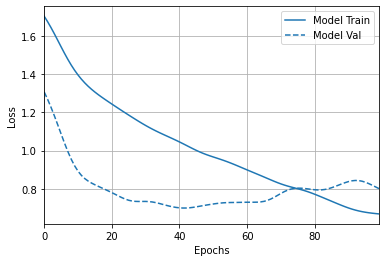

In [ ]:
histories = {}
histories['model'] = history
plotter = tfdocs.plots.HistoryPlotter(metric = 'loss', smoothing_std=10)
plotter.plot(histories)

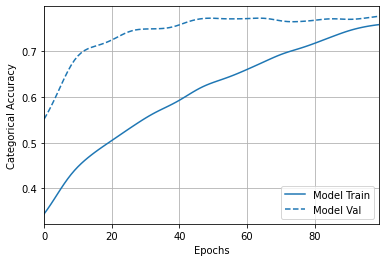

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'categorical_accuracy', smoothing_std=10)
plotter.plot(histories)

In [ ]:
lstm_model_attention.load_weights('/content/drive/My Drive/CZ4042/CZ4042 Project/lstm_attention_mixed_best_weights.hdf5')
loss, acc = lstm_model_attention.evaluate(X_test, Y_test_new, verbose=2)

14/14 - 0s - loss: 0.6089 - categorical_accuracy: 0.8093 - 137ms/epoch - 10ms/step


### CNN

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 1, 282, 256)       96256     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 1, 141, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 1, 141, 256)       1638656   
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 1, 71, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 1, 71, 128)        819328    
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 1, 36, 128)      

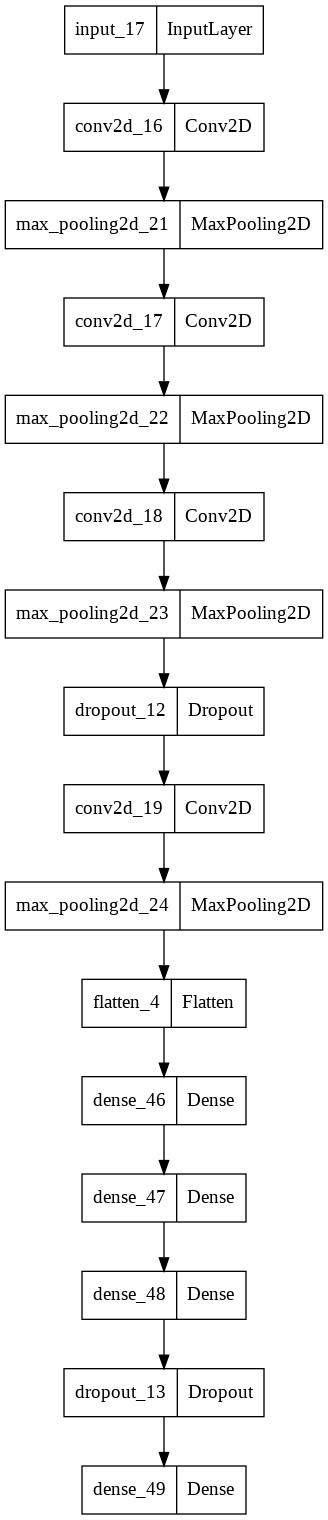

In [ ]:
cnn_model=Sequential()
cnn_model.add(Input(X_train.shape[1:4]))
cnn_model.add(Conv2D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
cnn_model.add(MaxPool2D(pool_size=5, strides = 2, padding = 'same'))

cnn_model.add(Conv2D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
cnn_model.add(MaxPool2D(pool_size=5, strides = 2, padding = 'same'))

cnn_model.add(Conv2D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
cnn_model.add(MaxPool2D(pool_size=5, strides = 2, padding = 'same'))
cnn_model.add(Dropout(0.2))

cnn_model.add(Conv2D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
cnn_model.add(MaxPool2D(pool_size=5, strides = 2, padding = 'same'))

cnn_model.add(Flatten())
cnn_model.add(Dense(units=256, activation='relu'))
cnn_model.add(Dense(units=64, activation='relu'))
cnn_model.add(Dense(units=32, activation='relu'))
cnn_model.add(Dropout(0.3))

cnn_model.add(Dense(units=8, activation='softmax'))

checkpoint_path = '/content/drive/My Drive/CZ4042/CZ4042 Project/cnn_best_weights.hdf5'
checkpoint_path_mixed = '/content/drive/My Drive/CZ4042/CZ4042 Project/cnn_mixed_best_weights.hdf5'

mcp_save = callbacks.ModelCheckpoint(checkpoint_path_mixed, save_best_only=True,
                           monitor='val_categorical_accuracy',
                           mode='max')
rlrop = callbacks.ReduceLROnPlateau(monitor='val_categorical_accuracy', 
                                    factor=0.01, patience=20)

cnn_model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),  # Optimizer
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()]
)

cnn_model.summary()
tf.keras.utils.plot_model(cnn_model)

#### Mel

In [ ]:
history = cnn_model.fit(X_train, Y_train_new, 
                      epochs=340, batch_size = 64, 
                      validation_data = (X_val, Y_val_new), 
                      callbacks = [mcp_save, rlrop])

Epoch 1/340
159/159 [==============================] - 9s 53ms/step - loss: 0.7399 - categorical_accuracy: 0.6817 - val_loss: 0.6047 - val_categorical_accuracy: 0.8392 - lr: 1.0000e-16
Epoch 2/340
159/159 [==============================] - 8s 52ms/step - loss: 0.7399 - categorical_accuracy: 0.6790 - val_loss: 0.6047 - val_categorical_accuracy: 0.8392 - lr: 1.0000e-16
Epoch 3/340
159/159 [==============================] - 8s 50ms/step - loss: 0.7428 - categorical_accuracy: 0.6819 - val_loss: 0.6047 - val_categorical_accuracy: 0.8392 - lr: 1.0000e-16
Epoch 4/340
159/159 [==============================] - 8s 51ms/step - loss: 0.7373 - categorical_accuracy: 0.6841 - val_loss: 0.6047 - val_categorical_accuracy: 0.8392 - lr: 1.0000e-16
Epoch 5/340
 29/159 [====>.........................] - ETA: 6s - loss: 0.7342 - categorical_accuracy: 0.6810

KeyboardInterrupt: ignored

In [ ]:
histories = {}
histories['model'] = history
plotter = tfdocs.plots.HistoryPlotter(metric = 'cross_entropy_loss', smoothing_std=10)
plotter.plot(histories)


NameError: ignored

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'accuracy', smoothing_std=10)
plotter.plot(histories)

In [ ]:
cnn_model.load_weights('/content/drive/My Drive/CZ4042/CZ4042 Project/cnn_best_weights.hdf5')
loss, acc = cnn_model.evaluate(X_test, Y_test_new, verbose=2)

In [ ]:
loss, acc = cnn_model.evaluate(X_test, Y_test_new, verbose=2)

14/14 - 1s - loss: 0.5586 - categorical_accuracy: 0.8605 - 658ms/epoch - 47ms/step


#### RMS + ZCR + MFCC (FINAL)

In [ ]:
history = cnn_model.fit(X_train, Y_train_new, 
                      epochs=100, batch_size = 64, 
                      validation_data = (X_val, Y_val_new), 
                      callbacks = [mcp_save, rlrop])

Epoch 1/100
159/159 [==============================] - 10s 52ms/step - loss: 2.0421 - categorical_accuracy: 0.1732 - val_loss: 1.9225 - val_categorical_accuracy: 0.2364 - lr: 0.0100
Epoch 2/100
159/159 [==============================] - 8s 48ms/step - loss: 1.9754 - categorical_accuracy: 0.2184 - val_loss: 1.7400 - val_categorical_accuracy: 0.3948 - lr: 0.0100
Epoch 3/100
159/159 [==============================] - 8s 48ms/step - loss: 1.9022 - categorical_accuracy: 0.2472 - val_loss: 1.4457 - val_categorical_accuracy: 0.4894 - lr: 0.0100
Epoch 4/100
159/159 [==============================] - 7s 47ms/step - loss: 1.8399 - categorical_accuracy: 0.2647 - val_loss: 1.4623 - val_categorical_accuracy: 0.4870 - lr: 0.0100
Epoch 5/100
159/159 [==============================] - 8s 49ms/step - loss: 1.7884 - categorical_accuracy: 0.2974 - val_loss: 1.1219 - val_categorical_accuracy: 0.5863 - lr: 0.0100
Epoch 6/100
159/159 [==============================] - 8s 49ms/step - loss: 1.7290 - categoric

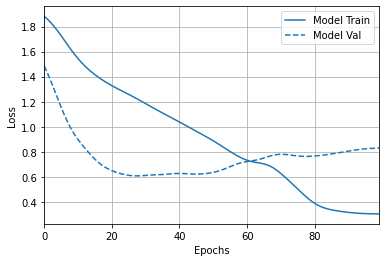

In [ ]:
histories = {}
histories['model'] = history
plotter = tfdocs.plots.HistoryPlotter(metric = 'loss', smoothing_std=10)
plotter.plot(histories)


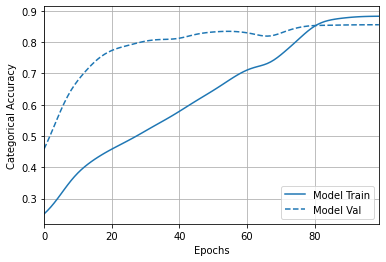

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'categorical_accuracy', smoothing_std=10)
plotter.plot(histories)

In [ ]:
cnn_model.load_weights('/content/drive/My Drive/CZ4042/CZ4042 Project/cnn_mixed_best_weights.hdf5')
loss, acc = cnn_model.evaluate(X_test, Y_test_new, verbose=2)

14/14 - 1s - loss: 0.3882 - categorical_accuracy: 0.8791 - 569ms/epoch - 41ms/step


### Hybrid model

Model: "hybrid_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 1, 282, 15)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_4 (Conv2D)              (None, 1, 282, 256)  96256       ['input_2[0][0]']                
                                                                                                  
 max_pooling2d_4 (MaxPooling2D)  (None, 1, 141, 256)  0          ['conv2d_4[0][0]']               
                                                                                                  
 conv2d_5 (Conv2D)              (None, 1, 141, 256)  1638656     ['max_pooling2d_4[0][0

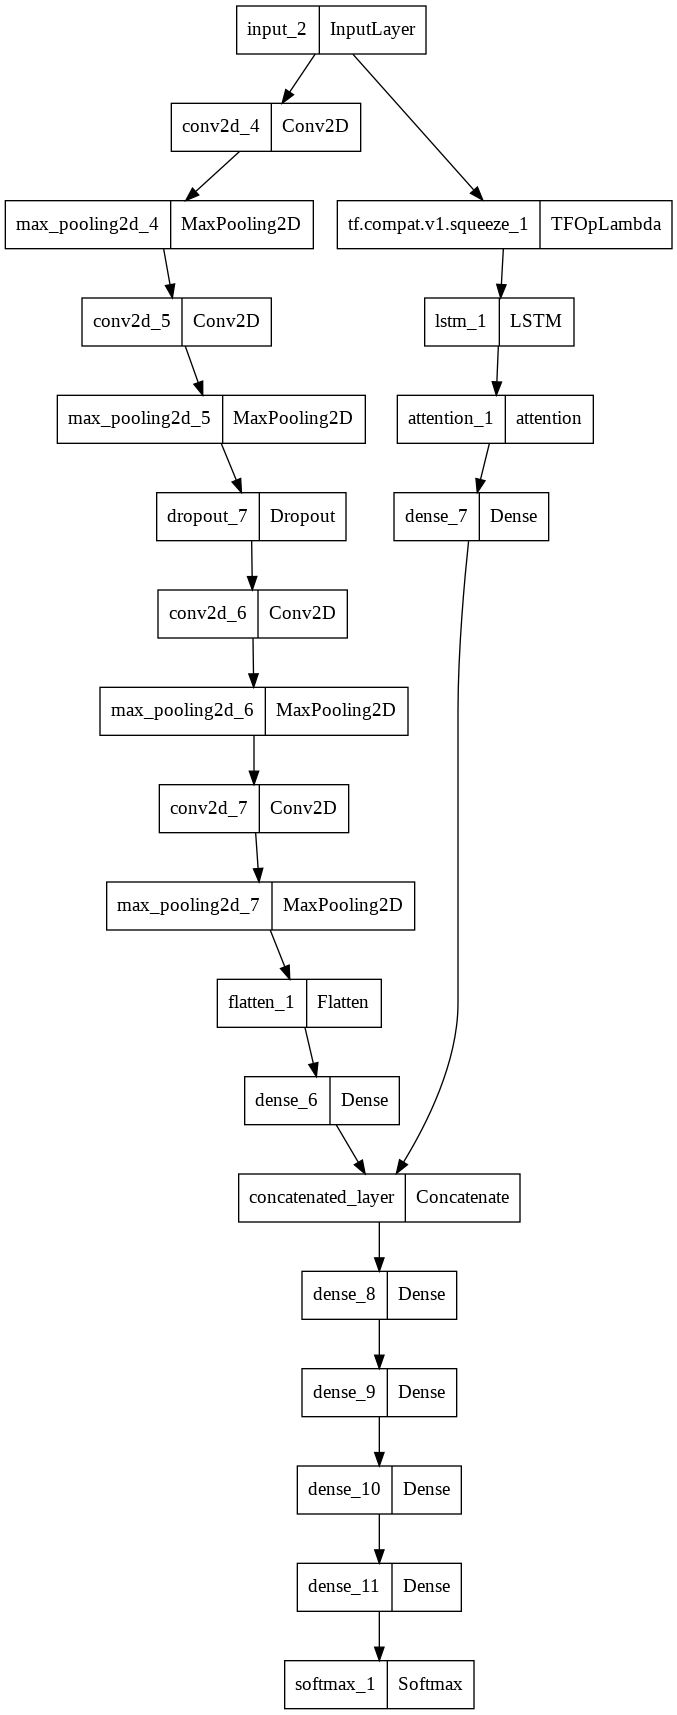

In [ ]:
# CONV Neural
# 1st conv layer
model1_in = Input(shape=(X_train.shape[1:4]))
model1_conv_1 = Conv2D(256, kernel_size=5, strides=1, padding='same', activation='relu' )(model1_in)
batch_max_pool_1 = MaxPool2D(pool_size=5, strides = 2, padding = 'same') (model1_conv_1)

# 2nd conv layer

model1_conv_2 = Conv2D(256, kernel_size=5, strides=1, padding='same', activation='relu')(batch_max_pool_1)
batch_max_pool_2 = MaxPool2D(pool_size=5, strides = 2, padding = 'same') (model1_conv_2)
dropout_2 = Dropout(0.2) (batch_max_pool_2)

# 3rd conv layer
model1_conv_3 = Conv2D(128, kernel_size=5, strides=1, padding='same', activation='relu')(dropout_2)
batch_max_pool_3 = MaxPool2D(pool_size=5, strides = 2, padding = 'same') (model1_conv_3)

# 4th conv layer
model1_conv_4 = Conv2D(64, kernel_size=5, strides=1, padding='same', activation='relu')(batch_max_pool_3)
batch_max_pool_4 = MaxPool2D(pool_size=5, strides = 2, padding = 'same') (model1_conv_4)
flatten = Flatten() (batch_max_pool_4)
model1_out = Dense(256,activation='relu') (flatten)


# #LSTM Model
squeezed = K.squeeze(model1_in, 1)
lstm1 = LSTM(64, return_sequences = True) (squeezed)
attention_layer = attention() (lstm1)
model2_out = Dense(256, activation = 'relu') (attention_layer)

#concat
merge  = concatenate([model1_out,model2_out],name="concatenated_layer")
dense = Dense(256, activation='relu') (merge)
dense2 = Dense(128, activation='relu') (dense)
dense3 = Dense(64, activation='relu') (dense2)
dense4 = Dense(8, activation='relu') (dense3)
output_layer = Softmax() (dense4)
hybrid = Model(inputs=[model1_in],outputs=[output_layer], name = "hybrid_model")

checkpoint_path = '/content/drive/My Drive/CZ4042/CZ4042 Project/hybrid_best_weights.hdf5'
checkpoint_path = '/content/drive/My Drive/CZ4042/CZ4042 Project/hybrid_mixed_best_weights.hdf5'

mcp_save = callbacks.ModelCheckpoint(checkpoint_path, save_best_only=True,
                           monitor='val_categorical_accuracy',
                           mode='max')
# rlrop = callbacks.ReduceLROnPlateau(monitor='val_categorical_accuracy', 
#                                     factor=0.01, patience=20)

hybrid.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),  # Optimizer
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()]
)

hybrid.summary()
tf.keras.utils.plot_model(hybrid)

#### Mel

In [ ]:
history = hybrid.fit(X_train, Y_train_new, 
                      epochs=200, batch_size = 128, 
                      validation_data = (X_val, Y_val_new), 
                      callbacks = [mcp_save])

Epoch 1/200
80/80 [==============================] - 5s 43ms/step - loss: 2.0572 - categorical_accuracy: 0.1770 - val_loss: 2.0298 - val_categorical_accuracy: 0.2009
Epoch 2/200
80/80 [==============================] - 2s 29ms/step - loss: 2.0336 - categorical_accuracy: 0.2033 - val_loss: 1.9840 - val_categorical_accuracy: 0.2648
Epoch 3/200
80/80 [==============================] - 2s 28ms/step - loss: 2.0090 - categorical_accuracy: 0.2266 - val_loss: 1.9239 - val_categorical_accuracy: 0.2955
Epoch 4/200
80/80 [==============================] - 2s 28ms/step - loss: 1.9894 - categorical_accuracy: 0.2348 - val_loss: 1.8605 - val_categorical_accuracy: 0.3428
Epoch 5/200
80/80 [==============================] - 2s 29ms/step - loss: 1.9688 - categorical_accuracy: 0.2429 - val_loss: 1.8274 - val_categorical_accuracy: 0.3499
Epoch 6/200
80/80 [==============================] - 2s 29ms/step - loss: 1.9503 - categorical_accuracy: 0.2551 - val_loss: 1.7971 - val_categorical_accuracy: 0.3948
Epoc

In [ ]:
histories = {}
histories['model'] = history
plotter = tfdocs.plots.HistoryPlotter(metric = 'cross_entropy_loss', smoothing_std=10)
plotter.plot(histories)
plotter = tfdocs.plots.HistoryPlotter(metric = 'accuracy', smoothing_std=10)
plotter.plot(histories)

In [ ]:
hybrid.load_weights('/content/drive/My Drive/CZ4042/CZ4042 Project/hybrid_best_weights.hdf5')
loss, acc = hybrid.evaluate(X_test, Y_test_new, verbose=2)

14/14 - 0s - loss: 0.8257 - categorical_accuracy: 0.7209 - 235ms/epoch - 17ms/step


#### RMS + ZCR + MFCC (FINAL)

In [ ]:
history = hybrid.fit(X_train, Y_train_new, 
                      epochs=200, batch_size = 128, 
                      validation_data = (X_val, Y_val_new), 
                      callbacks = [mcp_save])

Epoch 1/200
80/80 [==============================] - 9s 102ms/step - loss: 2.0614 - categorical_accuracy: 0.1791 - val_loss: 2.0263 - val_categorical_accuracy: 0.2530
Epoch 2/200
80/80 [==============================] - 7s 93ms/step - loss: 2.0279 - categorical_accuracy: 0.2191 - val_loss: 1.9481 - val_categorical_accuracy: 0.2837
Epoch 3/200
80/80 [==============================] - 8s 95ms/step - loss: 1.9983 - categorical_accuracy: 0.2378 - val_loss: 1.8961 - val_categorical_accuracy: 0.3546
Epoch 4/200
80/80 [==============================] - 7s 91ms/step - loss: 1.9731 - categorical_accuracy: 0.2571 - val_loss: 1.7916 - val_categorical_accuracy: 0.3357
Epoch 5/200
80/80 [==============================] - 8s 95ms/step - loss: 1.9465 - categorical_accuracy: 0.2624 - val_loss: 1.7117 - val_categorical_accuracy: 0.3806
Epoch 6/200
80/80 [==============================] - 7s 92ms/step - loss: 1.9030 - categorical_accuracy: 0.2763 - val_loss: 1.6839 - val_categorical_accuracy: 0.3759
Epo

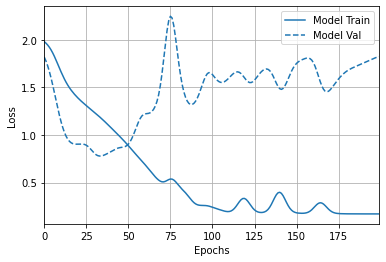

In [ ]:
histories = {}
histories['model'] = history
plotter = tfdocs.plots.HistoryPlotter(metric = 'loss', smoothing_std=10)
plotter.plot(histories)



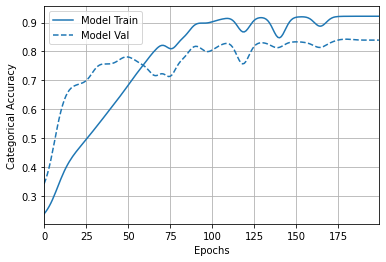

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'categorical_accuracy', smoothing_std=10)
plotter.plot(histories)

In [ ]:
hybrid.load_weights('/content/drive/My Drive/CZ4042/CZ4042 Project/hybrid_mixed_best_weights.hdf5')
loss, acc = hybrid.evaluate(X_test, Y_test_new, verbose=2)

14/14 - 0s - loss: 1.0338 - categorical_accuracy: 0.8465 - 299ms/epoch - 21ms/step


# Hyperparameter Tuning

The Hyperparamter tuning is only done on the Hybrid Model, which was chosen to be our final model. 

In [ ]:
from keras.layers import Layer
from keras import backend as K
# Add attention layer to the deep learning network
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)
 
    def build(self,input_shape):
        self.W=self.add_weight(name='attention_weight', shape=(input_shape[-1],1), 
                               initializer='random_normal', trainable=True)
        self.b=self.add_weight(name='attention_bias', shape=(input_shape[1],1), 
                               initializer='zeros', trainable=True)        
        super(attention, self).build(input_shape)
 
    def call(self,x):
        # Alignment scores. Pass them through tanh function
        e = K.tanh(K.dot(x,self.W)+self.b)
        # Remove dimension of size 1
        e = K.squeeze(e, axis=-1)   
        # Compute the weights
        alpha = K.softmax(e)
        # Reshape to tensorFlow format
        alpha = K.expand_dims(alpha, axis=-1)
        # Compute the context vector
        context = x * alpha
        context = K.sum(context, axis=1)
        return context

## Batch Size

In [ ]:
batch_size = [32,64,128,256]


for size in batch_size:
  # CONV Neural
  # 1st conv layer
  model1_in = Input(shape=(X_train.shape[1:4]))
  model1_conv_1 = Conv2D(256, kernel_size=5, strides=1, padding='same', activation='relu' )(model1_in)
  batch_max_pool_1 = MaxPool2D(pool_size=5, strides = 2, padding = 'same') (model1_conv_1)

  # 2nd conv layer

  model1_conv_2 = Conv2D(256, kernel_size=5, strides=1, padding='same', activation='relu')(batch_max_pool_1)
  batch_max_pool_2 = MaxPool2D(pool_size=5, strides = 2, padding = 'same') (model1_conv_2)
  dropout_2 = Dropout(0.2) (batch_max_pool_2)

  # 3rd conv layer
  model1_conv_3 = Conv2D(128, kernel_size=5, strides=1, padding='same', activation='relu')(dropout_2)
  batch_max_pool_3 = MaxPool2D(pool_size=5, strides = 2, padding = 'same') (model1_conv_3)

  # 4th conv layer
  model1_conv_4 = Conv2D(64, kernel_size=5, strides=1, padding='same', activation='relu')(batch_max_pool_3)
  batch_max_pool_4 = MaxPool2D(pool_size=5, strides = 2, padding = 'same') (model1_conv_4)
  flatten = Flatten() (batch_max_pool_4)
  model1_out = Dense(256,activation='relu') (flatten)


  # #LSTM Model
  squeezed = K.squeeze(model1_in, 1)
  lstm1 = LSTM(64, return_sequences = True) (squeezed)
  attention_layer = attention() (lstm1)
  model2_out = Dense(256, activation = 'relu') (attention_layer)
  merge  = concatenate([model1_out,model2_out],name="concatenated_layer")
  dense = Dense(256, activation='relu') (merge)
  dense2 = Dense(128, activation='relu') (dense)
  dense3 = Dense(64, activation='relu') (dense2)
  dense4 = Dense(8, activation='relu') (dense3)
  output_layer = Softmax() (dense4)
  hybrid = Model(inputs=[model1_in],outputs=[output_layer], name = "hybrid_model")

  checkpoint_path = '/content/drive/My Drive/CZ4042/CZ4042 Project/hybrid_batch' + str(size) +'_best_weights.hdf5'
  print(checkpoint_path)

  mcp_save = callbacks.ModelCheckpoint(checkpoint_path, save_best_only=True,
                            monitor='val_categorical_accuracy',
                            mode='max')

  hybrid.compile(
      optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),  # Optimizer
      loss=tf.keras.losses.CategoricalCrossentropy(),
      metrics=[tf.keras.metrics.CategoricalAccuracy()]
  )

  hybrid.summary()
  tf.keras.utils.plot_model(hybrid)
  history = hybrid.fit(X_train, Y_train_new, 
                        epochs=100, batch_size = size, 
                        validation_data = (X_val, Y_val_new), 
                        callbacks = [mcp_save])

/content/drive/My Drive/CZ4042/CZ4042 Project/hybrid_batch32_best_weights.hdf5
Model: "hybrid_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 1, 282, 15)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 1, 282, 256)  96256       ['input_6[0][0]']                
                                                                                                  
 max_pooling2d_20 (MaxPooling2D  (None, 1, 141, 256)  0          ['conv2d_20[0][0]']              
 )                                                                                                
        

In [ ]:
val_accuracies = []

for size in batch_size:
  hybrid.load_weights('/content/drive/My Drive/CZ4042/CZ4042 Project/hybrid_batch' + str(size) +'_best_weights.hdf5')
  loss, acc = hybrid.evaluate(X_val, Y_val_new, verbose=2)
  val_accuracies.append(acc)

14/14 - 0s - loss: 1.1708 - categorical_accuracy: 0.8558 - 124ms/epoch - 9ms/step
14/14 - 0s - loss: 1.2582 - categorical_accuracy: 0.8487 - 120ms/epoch - 9ms/step
14/14 - 0s - loss: 0.8980 - categorical_accuracy: 0.8511 - 120ms/epoch - 9ms/step
14/14 - 0s - loss: 0.6640 - categorical_accuracy: 0.8156 - 123ms/epoch - 9ms/step


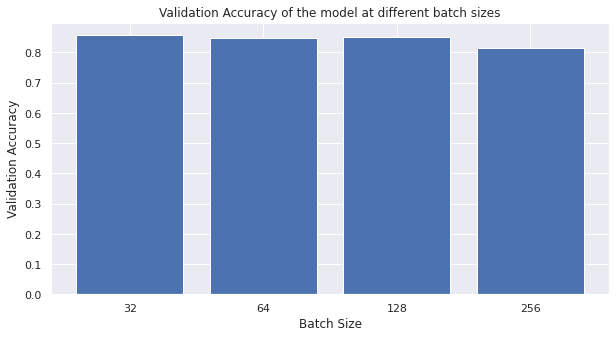

In [ ]:
fig = plt.figure(figsize = (10, 5))

batch_size_string = ['32','64','128','256']
plt.bar(batch_size_string,val_accuracies)
plt.xlabel("Batch Size")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy of the model at different batch sizes")
plt.show()

## Optimizers

In [ ]:
optimal_batch_size = 128
optimizers = ["RMSprop" , "SGD", "Adam"]


for optimizer in optimizers:

  if optimizer == "RMSprop":
    keras_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01)

  elif optimizer == "SGD":
    keras_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

  elif optimizer == "Adam":
    keras_optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

  else:
    keras_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)



  # CONV Neural
  # 1st conv layer
  model1_in = Input(shape=(X_train.shape[1:4]))
  model1_conv_1 = Conv2D(256, kernel_size=5, strides=1, padding='same', activation='relu' )(model1_in)
  batch_max_pool_1 = MaxPool2D(pool_size=5, strides = 2, padding = 'same') (model1_conv_1)

  # 2nd conv layer

  model1_conv_2 = Conv2D(256, kernel_size=5, strides=1, padding='same', activation='relu')(batch_max_pool_1)
  batch_max_pool_2 = MaxPool2D(pool_size=5, strides = 2, padding = 'same') (model1_conv_2)
  dropout_2 = Dropout(0.2) (batch_max_pool_2)

  # 3rd conv layer
  model1_conv_3 = Conv2D(128, kernel_size=5, strides=1, padding='same', activation='relu')(dropout_2)
  batch_max_pool_3 = MaxPool2D(pool_size=5, strides = 2, padding = 'same') (model1_conv_3)

  # 4th conv layer
  model1_conv_4 = Conv2D(64, kernel_size=5, strides=1, padding='same', activation='relu')(batch_max_pool_3)
  batch_max_pool_4 = MaxPool2D(pool_size=5, strides = 2, padding = 'same') (model1_conv_4)
  flatten = Flatten() (batch_max_pool_4)
  model1_out = Dense(256,activation='relu') (flatten)


  # #LSTM Model
  squeezed = K.squeeze(model1_in, 1)
  lstm1 = LSTM(64, return_sequences = True) (squeezed)
  attention_layer = attention() (lstm1)
  model2_out = Dense(256, activation = 'relu') (attention_layer)
  merge  = concatenate([model1_out,model2_out],name="concatenated_layer")
  dense = Dense(256, activation='relu') (merge)
  dense2 = Dense(128, activation='relu') (dense)
  dense3 = Dense(64, activation='relu') (dense2)
  dense4 = Dense(8, activation='relu') (dense3)
  output_layer = Softmax() (dense4)
  hybrid = Model(inputs=[model1_in],outputs=[output_layer], name = "hybrid_model")

  checkpoint_path = '/content/drive/My Drive/CZ4042/CZ4042 Project/hybrid_optimizer' + str(optimizer) +'_best_weights.hdf5'
  print(checkpoint_path)

  mcp_save = callbacks.ModelCheckpoint(checkpoint_path, save_best_only=True,
                            monitor='val_categorical_accuracy',
                            mode='max')

  rlrop = callbacks.ReduceLROnPlateau(monitor='val_categorical_accuracy', 
                                    factor=0.01, patience=20)

  
  hybrid.compile(
      optimizer=keras_optimizer,
      loss=tf.keras.losses.CategoricalCrossentropy(),
      metrics=[tf.keras.metrics.CategoricalAccuracy()]
      )

  hybrid.summary()
  tf.keras.utils.plot_model(hybrid)
  history = hybrid.fit(X_train, Y_train_new, 
                        epochs=100, batch_size = optimal_batch_size, 
                        validation_data = (X_val, Y_val_new), 
                        callbacks = [mcp_save,rlrop])

/content/drive/My Drive/CZ4042/CZ4042 Project/hybrid_optimizerRMSprop_best_weights.hdf5
Model: "hybrid_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 1, 282, 15)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_48 (Conv2D)             (None, 1, 282, 256)  96256       ['input_13[0][0]']               
                                                                                                  
 max_pooling2d_48 (MaxPooling2D  (None, 1, 141, 256)  0          ['conv2d_48[0][0]']              
 )                                                                                                

In [ ]:
val_accuracies = []

for optimizer in optimizers:
  hybrid.load_weights('/content/drive/My Drive/CZ4042/CZ4042 Project/hybrid_optimizer' + str(optimizer) +'_best_weights.hdf5')
  loss, acc = hybrid.evaluate(X_val, Y_val_new, verbose=2)
  val_accuracies.append(acc)

14/14 - 0s - loss: 2.0794 - categorical_accuracy: 0.1395 - 122ms/epoch - 9ms/step
14/14 - 0s - loss: 1.1499 - categorical_accuracy: 0.8203 - 119ms/epoch - 9ms/step
14/14 - 0s - loss: 1.6793 - categorical_accuracy: 0.3522 - 125ms/epoch - 9ms/step


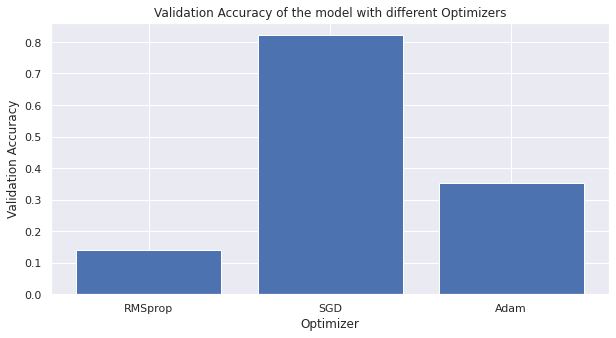

In [ ]:
fig = plt.figure(figsize = (10, 5))

plt.bar(optimizers,val_accuracies)
plt.xlabel("Optimizer")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy of the model with different Optimizers")
plt.show()

## Learning rate

In [ ]:
optimal_batch_size = 128
optimal_optimizers = "SGD"
learning_rates = [0.0001, 0.0005, 0.001,0.005,0.01,0.05]


for lr in learning_rates:

  if optimal_optimizers == "RMSprop":
    keras_optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr)

  elif optimal_optimizers == "SGD":
    keras_optimizer = tf.keras.optimizers.SGD(learning_rate=lr)

  elif optimal_optimizers == "Adam":
    keras_optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

  else:
    keras_optimizer = tf.keras.optimizers.SGD(learning_rate=lr)



  # CONV Neural
  # 1st conv layer
  model1_in = Input(shape=(X_train.shape[1:4]))
  model1_conv_1 = Conv2D(256, kernel_size=5, strides=1, padding='same', activation='relu' )(model1_in)
  batch_max_pool_1 = MaxPool2D(pool_size=5, strides = 2, padding = 'same') (model1_conv_1)

  # 2nd conv layer

  model1_conv_2 = Conv2D(256, kernel_size=5, strides=1, padding='same', activation='relu')(batch_max_pool_1)
  batch_max_pool_2 = MaxPool2D(pool_size=5, strides = 2, padding = 'same') (model1_conv_2)
  dropout_2 = Dropout(0.2) (batch_max_pool_2)

  # 3rd conv layer
  model1_conv_3 = Conv2D(128, kernel_size=5, strides=1, padding='same', activation='relu')(dropout_2)
  batch_max_pool_3 = MaxPool2D(pool_size=5, strides = 2, padding = 'same') (model1_conv_3)

  # 4th conv layer
  model1_conv_4 = Conv2D(64, kernel_size=5, strides=1, padding='same', activation='relu')(batch_max_pool_3)
  batch_max_pool_4 = MaxPool2D(pool_size=5, strides = 2, padding = 'same') (model1_conv_4)
  flatten = Flatten() (batch_max_pool_4)
  model1_out = Dense(256,activation='relu') (flatten)


  # #LSTM Model
  squeezed = K.squeeze(model1_in, 1)
  lstm1 = LSTM(64, return_sequences = True) (squeezed)
  attention_layer = attention() (lstm1)
  model2_out = Dense(256, activation = 'relu') (attention_layer)
  merge  = concatenate([model1_out,model2_out],name="concatenated_layer")
  dense = Dense(256, activation='relu') (merge)
  dense2 = Dense(128, activation='relu') (dense)
  dense3 = Dense(64, activation='relu') (dense2)
  dense4 = Dense(8, activation='relu') (dense3)
  output_layer = Softmax() (dense4)
  hybrid = Model(inputs=[model1_in],outputs=[output_layer], name = "hybrid_model")

  checkpoint_path = '/content/drive/My Drive/CZ4042/CZ4042 Project/hybrid_lr' + str(lr) +'_best_weights.hdf5'
  print(checkpoint_path)

  mcp_save = callbacks.ModelCheckpoint(checkpoint_path, save_best_only=True,
                            monitor='val_categorical_accuracy',
                            mode='max')
  
  hybrid.compile(
      optimizer=keras_optimizer,
      loss=tf.keras.losses.CategoricalCrossentropy(),
      metrics=[tf.keras.metrics.CategoricalAccuracy()]
      )

  hybrid.summary()
  tf.keras.utils.plot_model(hybrid)
  history = hybrid.fit(X_train, Y_train_new, 
                        epochs=100, batch_size = optimal_batch_size, 
                        validation_data = (X_val, Y_val_new), 
                        callbacks = [mcp_save])

/content/drive/My Drive/CZ4042/CZ4042 Project/hybrid_lr0.0001_best_weights.hdf5
Model: "hybrid_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 1, 282, 15)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_60 (Conv2D)             (None, 1, 282, 256)  96256       ['input_16[0][0]']               
                                                                                                  
 max_pooling2d_60 (MaxPooling2D  (None, 1, 141, 256)  0          ['conv2d_60[0][0]']              
 )                                                                                                
       

In [ ]:
val_accuracies = []

for lr in learning_rates:
  hybrid.load_weights('/content/drive/My Drive/CZ4042/CZ4042 Project/hybrid_lr' + str(lr) +'_best_weights.hdf5')
  loss, acc = hybrid.evaluate(X_val, Y_val_new, verbose=2)
  val_accuracies.append(acc)

14/14 - 0s - loss: 1.9090 - categorical_accuracy: 0.3310 - 125ms/epoch - 9ms/step
14/14 - 0s - loss: 1.1949 - categorical_accuracy: 0.6076 - 129ms/epoch - 9ms/step
14/14 - 0s - loss: 1.0950 - categorical_accuracy: 0.6383 - 125ms/epoch - 9ms/step
14/14 - 0s - loss: 0.8787 - categorical_accuracy: 0.7234 - 119ms/epoch - 9ms/step
14/14 - 0s - loss: 0.9380 - categorical_accuracy: 0.8463 - 126ms/epoch - 9ms/step
14/14 - 0s - loss: 0.9190 - categorical_accuracy: 0.8487 - 119ms/epoch - 8ms/step


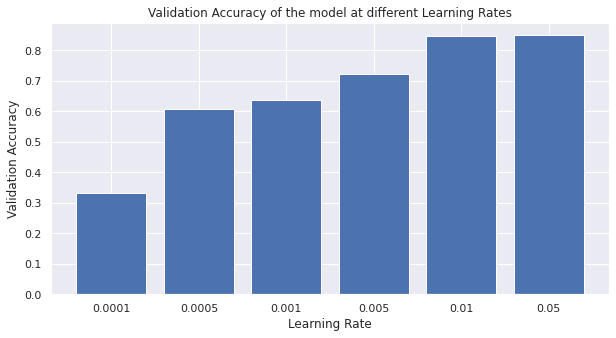

In [ ]:
fig = plt.figure(figsize = (10, 5))

learning_rates_string = ['0.0001','0.0005','0.001','0.005','0.01','0.05']
plt.bar(learning_rates_string,val_accuracies)
plt.xlabel("Learning Rate")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy of the model at different Learning Rates")
plt.show()

## Dropout

In [ ]:
optimal_batch_size = 128
optimal_optimizers = "SGD"
optimal_learning_rate = 0.01
dropouts = [0.1,0.2,0.3,0.4]

for dropout in dropouts:

  if optimal_optimizers == "RMSprop":
    keras_optimizer = tf.keras.optimizers.RMSprop(learning_rate=optimal_learning_rate)

  elif optimal_optimizers == "SGD":
    keras_optimizer = tf.keras.optimizers.SGD(learning_rate=optimal_learning_rate)

  elif optimal_optimizers == "Adam":
    keras_optimizer = tf.keras.optimizers.Adam(learning_rate=optimal_learning_rate)

  else:
    keras_optimizer = tf.keras.optimizers.SGD(learning_rate=optimal_learning_rate)



  # CONV Neural
  # 1st conv layer
  model1_in = Input(shape=(X_train.shape[1:4]))
  model1_conv_1 = Conv2D(256, kernel_size=5, strides=1, padding='same', activation='relu' )(model1_in)
  batch_max_pool_1 = MaxPool2D(pool_size=5, strides = 2, padding = 'same') (model1_conv_1)
  dropout_1 = Dropout(dropout) (batch_max_pool_1)

  # 2nd conv layer

  model1_conv_2 = Conv2D(256, kernel_size=5, strides=1, padding='same', activation='relu')(dropout_1)
  batch_max_pool_2 = MaxPool2D(pool_size=5, strides = 2, padding = 'same') (model1_conv_2)
  dropout_2 = Dropout(dropout) (batch_max_pool_2)

  # 3rd conv layer
  model1_conv_3 = Conv2D(128, kernel_size=5, strides=1, padding='same', activation='relu')(dropout_2)
  batch_max_pool_3 = MaxPool2D(pool_size=5, strides = 2, padding = 'same') (model1_conv_3)
  dropout_3 = Dropout(dropout) (batch_max_pool_3)


  # 4th conv layer
  model1_conv_4 = Conv2D(64, kernel_size=5, strides=1, padding='same', activation='relu')(dropout_3)
  batch_max_pool_4 = MaxPool2D(pool_size=5, strides = 2, padding = 'same') (model1_conv_4)
  dropout_4 = Dropout(dropout) (batch_max_pool_4)
  flatten = Flatten() (dropout_4)
  model1_out = Dense(256,activation='relu') (flatten)


  # #LSTM Model
  squeezed = K.squeeze(model1_in, 1)
  lstm1 = LSTM(64, return_sequences = True) (squeezed)
  attention_layer = attention() (lstm1)
  model2_out = Dense(256, activation = 'relu') (attention_layer)
  
  
  merge  = concatenate([model1_out,model2_out],name="concatenated_layer")
  dense = Dense(256, activation='relu') (merge)
  dropout_4 = Dropout(dropout) (dense)
  dense2 = Dense(128, activation='relu') (dropout_4)
  dropout_5 = Dropout(dropout) (dense2)
  dense3 = Dense(64, activation='relu') (dropout_5)
  dropout_6 = Dropout(dropout) (dense3)
  dense4 = Dense(8, activation='relu') (dropout_6)
  output_layer = Softmax() (dense4)
  hybrid = Model(inputs=[model1_in],outputs=[output_layer], name = "hybrid_model")

  checkpoint_path = '/content/drive/My Drive/CZ4042/CZ4042 Project/hybrid_dropout' + str(dropout) +'_best_weights.hdf5'
  print(checkpoint_path)

  mcp_save = callbacks.ModelCheckpoint(checkpoint_path, save_best_only=True,
                            monitor='val_categorical_accuracy',
                            mode='max')
  
  hybrid.compile(
      optimizer=keras_optimizer,
      loss=tf.keras.losses.CategoricalCrossentropy(),
      metrics=[tf.keras.metrics.CategoricalAccuracy()]
      )

  hybrid.summary()
  tf.keras.utils.plot_model(hybrid)
  history = hybrid.fit(X_train, Y_train_new, 
                        epochs=100, batch_size = optimal_batch_size, 
                        validation_data = (X_val, Y_val_new), 
                        callbacks = [mcp_save])

/content/drive/My Drive/CZ4042/CZ4042 Project/hybrid_dropout0.1_best_weights.hdf5
Model: "hybrid_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_22 (InputLayer)          [(None, 1, 282, 15)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_84 (Conv2D)             (None, 1, 282, 256)  96256       ['input_22[0][0]']               
                                                                                                  
 max_pooling2d_84 (MaxPooling2D  (None, 1, 141, 256)  0          ['conv2d_84[0][0]']              
 )                                                                                                
     

In [ ]:
val_accuracies = []

for dropout in dropouts:
  hybrid.load_weights('/content/drive/My Drive/CZ4042/CZ4042 Project/hybrid_dropout' + str(dropout) +'_best_weights.hdf5')
  loss, acc = hybrid.evaluate(X_val, Y_val_new, verbose=2)
  val_accuracies.append(acc)

14/14 - 0s - loss: 0.4066 - categorical_accuracy: 0.8747 - 123ms/epoch - 9ms/step
14/14 - 0s - loss: 0.5004 - categorical_accuracy: 0.8582 - 121ms/epoch - 9ms/step
14/14 - 0s - loss: 0.6715 - categorical_accuracy: 0.7778 - 120ms/epoch - 9ms/step
14/14 - 0s - loss: 1.1061 - categorical_accuracy: 0.6879 - 118ms/epoch - 8ms/step


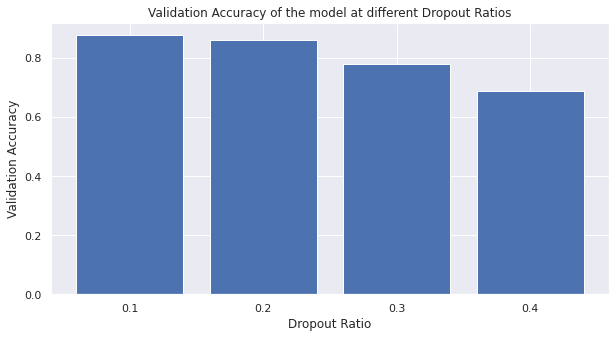

In [ ]:
fig = plt.figure(figsize = (10, 5))

dropout_string = ['0.1','0.2','0.3','0.4']
plt.bar(dropout_string,val_accuracies)
plt.xlabel("Dropout Ratio")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy of the model at different Dropout Ratios")
plt.show()

# Final Model 

Hyperparameters used:


*   Batch Size: 128
*   Optimizer: SGD
* Learning Rate: 0.001
* Dropout Ratio: 0.1

Since we are using the ModelCheckpoint Callback function, this reduces overfitting on the train data as well.


In [ ]:
from keras.layers import Layer
from keras import backend as K
# Add attention layer to the deep learning network
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)
 
    def build(self,input_shape):
        self.W=self.add_weight(name='attention_weight', shape=(input_shape[-1],1), 
                               initializer='random_normal', trainable=True)
        self.b=self.add_weight(name='attention_bias', shape=(input_shape[1],1), 
                               initializer='zeros', trainable=True)        
        super(attention, self).build(input_shape)
 
    def call(self,x):
        # Alignment scores. Pass them through tanh function
        e = K.tanh(K.dot(x,self.W)+self.b)
        # Remove dimension of size 1
        e = K.squeeze(e, axis=-1)   
        # Compute the weights
        alpha = K.softmax(e)
        # Reshape to tensorFlow format
        alpha = K.expand_dims(alpha, axis=-1)
        # Compute the context vector
        context = x * alpha
        context = K.sum(context, axis=1)
        return context

/content/drive/My Drive/CZ4042/CZ4042 Project/final_model2_best_weights.hdf5
Model: "hybrid_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 1, 282, 15)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_24 (Conv2D)             (None, 1, 282, 256)  96256       ['input_7[0][0]']                
                                                                                                  
 max_pooling2d_24 (MaxPooling2D  (None, 1, 141, 256)  0          ['conv2d_24[0][0]']              
 )                                                                                                
          

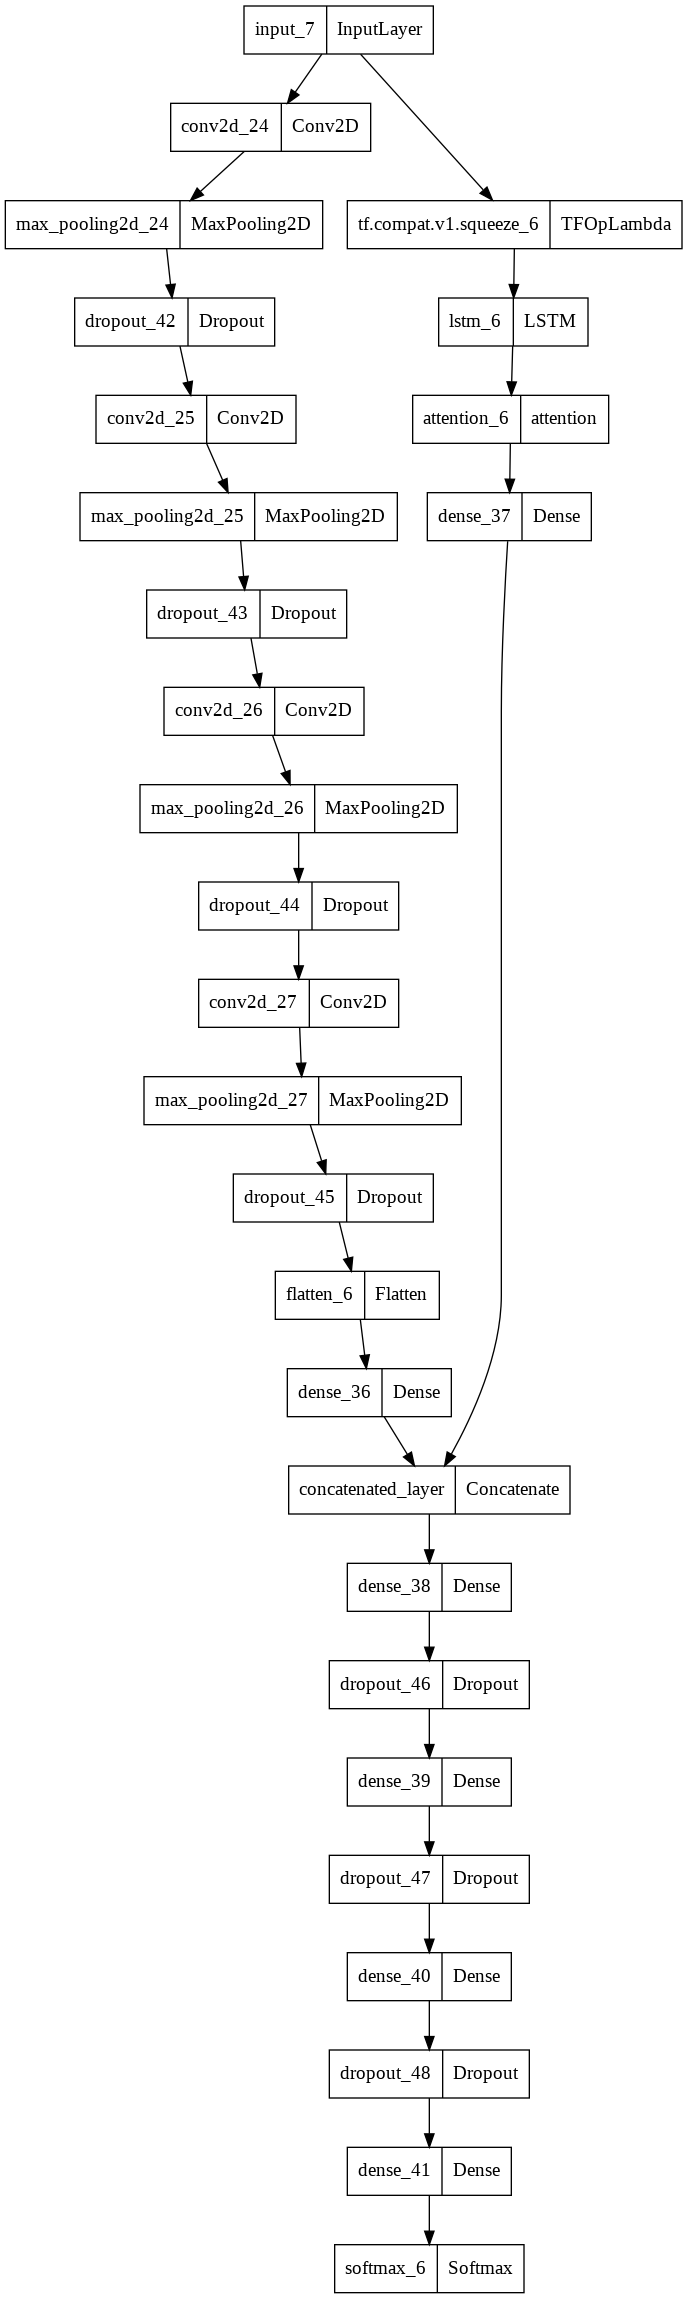

In [ ]:
optimal_batch_size = 128
optimal_optimizers = "SGD"
optimal_learning_rate = 0.01
dropout = 0.1
keras_optimizer = tf.keras.optimizers.SGD(learning_rate=optimal_learning_rate)


# CONV Neural
# 1st conv layer
model1_in = Input(shape=(X_train.shape[1:4]))
model1_conv_1 = Conv2D(256, kernel_size=5, strides=1, padding='same', activation='relu' )(model1_in)
batch_max_pool_1 = MaxPool2D(pool_size=5, strides = 2, padding = 'same') (model1_conv_1)
dropout_1 = Dropout(dropout) (batch_max_pool_1)

# 2nd conv layer

model1_conv_2 = Conv2D(256, kernel_size=5, strides=1, padding='same', activation='relu')(dropout_1)
batch_max_pool_2 = MaxPool2D(pool_size=5, strides = 2, padding = 'same') (model1_conv_2)
dropout_2 = Dropout(dropout) (batch_max_pool_2)

# 3rd conv layer
model1_conv_3 = Conv2D(128, kernel_size=5, strides=1, padding='same', activation='relu')(dropout_2)
batch_max_pool_3 = MaxPool2D(pool_size=5, strides = 2, padding = 'same') (model1_conv_3)
dropout_3 = Dropout(dropout) (batch_max_pool_3)


# 4th conv layer
model1_conv_4 = Conv2D(64, kernel_size=5, strides=1, padding='same', activation='relu')(dropout_3)
batch_max_pool_4 = MaxPool2D(pool_size=5, strides = 2, padding = 'same') (model1_conv_4)
dropout_4 = Dropout(dropout) (batch_max_pool_4)
flatten = Flatten() (dropout_4)
model1_out = Dense(256,activation='relu') (flatten)


# #LSTM Model
squeezed = K.squeeze(model1_in, 1)
lstm1 = LSTM(64, return_sequences = True) (squeezed)
attention_layer = attention() (lstm1)
model2_out = Dense(256, activation = 'relu') (attention_layer)
  
  
merge  = concatenate([model1_out,model2_out],name="concatenated_layer")
dense = Dense(256, activation='relu') (merge)
dropout_4 = Dropout(dropout) (dense)
dense2 = Dense(128, activation='relu') (dropout_4)
dropout_5 = Dropout(dropout) (dense2)
dense3 = Dense(64, activation='relu') (dropout_5)
dropout_6 = Dropout(dropout) (dense3)
dense4 = Dense(8, activation='relu') (dropout_6)
output_layer = Softmax() (dense4)
hybrid = Model(inputs=[model1_in],outputs=[output_layer], name = "hybrid_model")

checkpoint_path = '/content/drive/My Drive/CZ4042/CZ4042 Project/final_model2_best_weights.hdf5'
print(checkpoint_path)

mcp_save = callbacks.ModelCheckpoint(checkpoint_path)
  
hybrid.compile(
      optimizer=keras_optimizer,
      loss=tf.keras.losses.CategoricalCrossentropy(),
      metrics=[tf.keras.metrics.CategoricalAccuracy()]
      )

hybrid.summary()
tf.keras.utils.plot_model(hybrid)

In [ ]:
history = hybrid.fit(X_train, Y_train_new, 
                    epochs=130, batch_size = optimal_batch_size, 
                    validation_data = (X_val, Y_val_new), 
                    callbacks = [mcp_save])

Epoch 1/130
80/80 [==============================] - 5s 36ms/step - loss: 2.0782 - categorical_accuracy: 0.1505 - val_loss: 2.0618 - val_categorical_accuracy: 0.2175
Epoch 2/130
80/80 [==============================] - 2s 22ms/step - loss: 2.0550 - categorical_accuracy: 0.1821 - val_loss: 2.0374 - val_categorical_accuracy: 0.2671
Epoch 3/130
80/80 [==============================] - 2s 22ms/step - loss: 2.0243 - categorical_accuracy: 0.2078 - val_loss: 1.9355 - val_categorical_accuracy: 0.3499
Epoch 4/130
80/80 [==============================] - 2s 22ms/step - loss: 1.9952 - categorical_accuracy: 0.2178 - val_loss: 1.8557 - val_categorical_accuracy: 0.3404
Epoch 5/130
80/80 [==============================] - 2s 22ms/step - loss: 1.9637 - categorical_accuracy: 0.2358 - val_loss: 1.7806 - val_categorical_accuracy: 0.3546
Epoch 6/130
80/80 [==============================] - 2s 22ms/step - loss: 1.9351 - categorical_accuracy: 0.2491 - val_loss: 1.6849 - val_categorical_accuracy: 0.4090
Epoc

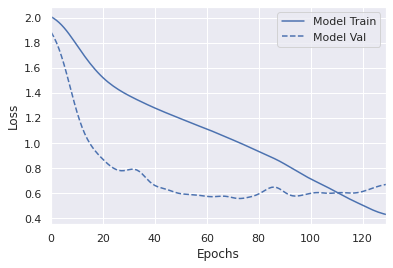

In [ ]:
histories = {}
histories['model'] = history
plotter = tfdocs.plots.HistoryPlotter(metric = 'loss', smoothing_std=10)
plotter.plot(histories)

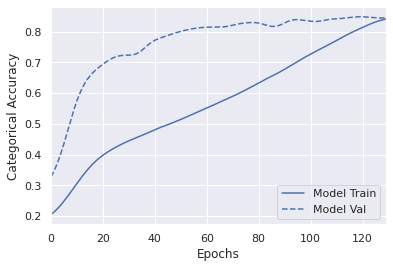

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'categorical_accuracy', smoothing_std=10)
plotter.plot(histories)

In [ ]:
hybrid.load_weights('/content/drive/My Drive/CZ4042/CZ4042 Project/final_model2_best_weights.hdf5')
loss, acc = hybrid.evaluate(X_test, Y_test_new, verbose=2)

14/14 - 0s - loss: 0.5437 - categorical_accuracy: 0.8628 - 133ms/epoch - 9ms/step


# Real-Time 

In [ ]:
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import io


In [ ]:
!pip install ffmpeg-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
from scipy.io.wavfile import read as wav_read
import io
import ffmpeg

AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");
my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);
var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;
var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };            
  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {            
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);
    reader = new FileReader();
    reader.readAsDataURL(e.data); 
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };
recordButton.innerText = "Recording... press to stop";
navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);
function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... pls wait!"
  }
}
// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}
var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()
sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())
});
}
});
      
</script>
"""

def get_audio():
  display(HTML(AUDIO_HTML))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  
  process = (ffmpeg
    .input('pipe:0')
    .output('pipe:1', format='wav')
    .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
  )
  output, err = process.communicate(input=binary)
  
  riff_chunk_size = len(output) - 8
  # Break up the chunk size into four bytes, held in b.
  q = riff_chunk_size
  b = []
  for i in range(4):
      q, r = divmod(q, 256)
      b.append(r)

  # Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
  riff = output[:4] + bytes(b) + output[8:]

  return io.BytesIO(riff)

In [ ]:
!pip install pydub
!pip install noisereduce
!pip install json-tricks
!sudo apt install build-essential portaudio19-dev python3.10-dev
!pip install pyaudio



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libportaudio2 libportaudiocpp0 libpython3.10 libpython3.10-dev
  libpython3.10-minimal libpython3.10-stdlib python3.10 python3.10-minimal
Suggested packages:
  portaudio19-doc python3.10-venv binfmt-support
The following NEW packages will be installed:
  libportaudio2 libportaudiocpp0 libpython3.10 libpython3.10-dev
  libpython3.10-minimal libpython

## Model Definition

In [ ]:
import noisereduce as nr

In [ ]:
from keras.layers import Layer
from keras import backend as K
# Add attention layer to the deep learning network
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)
 
    def build(self,input_shape):
        self.W=self.add_weight(name='attention_weight', shape=(input_shape[-1],1), 
                               initializer='random_normal', trainable=True)
        self.b=self.add_weight(name='attention_bias', shape=(input_shape[1],1), 
                               initializer='zeros', trainable=True)        
        super(attention, self).build(input_shape)
 
    def call(self,x):
        # Alignment scores. Pass them through tanh function
        e = K.tanh(K.dot(x,self.W)+self.b)
        # Remove dimension of size 1
        e = K.squeeze(e, axis=-1)   
        # Compute the weights
        alpha = K.softmax(e)
        # Reshape to tensorFlow format
        alpha = K.expand_dims(alpha, axis=-1)
        # Compute the context vector
        context = x * alpha
        context = K.sum(context, axis=1)
        return context

In [ ]:
optimal_batch_size = 128
optimal_optimizers = "SGD"
optimal_learning_rate = 0.01
dropout = 0.1
keras_optimizer = tf.keras.optimizers.SGD(learning_rate=optimal_learning_rate)


# CONV Neural
# 1st conv layer
model1_in = Input(shape=(1,282,15))
model1_conv_1 = Conv2D(256, kernel_size=5, strides=1, padding='same', activation='relu' )(model1_in)
batch_max_pool_1 = MaxPool2D(pool_size=5, strides = 2, padding = 'same') (model1_conv_1)
dropout_1 = Dropout(dropout) (batch_max_pool_1)

# 2nd conv layer

model1_conv_2 = Conv2D(256, kernel_size=5, strides=1, padding='same', activation='relu')(dropout_1)
batch_max_pool_2 = MaxPool2D(pool_size=5, strides = 2, padding = 'same') (model1_conv_2)
dropout_2 = Dropout(dropout) (batch_max_pool_2)

# 3rd conv layer
model1_conv_3 = Conv2D(128, kernel_size=5, strides=1, padding='same', activation='relu')(dropout_2)
batch_max_pool_3 = MaxPool2D(pool_size=5, strides = 2, padding = 'same') (model1_conv_3)
dropout_3 = Dropout(dropout) (batch_max_pool_3)


# 4th conv layer
model1_conv_4 = Conv2D(64, kernel_size=5, strides=1, padding='same', activation='relu')(dropout_3)
batch_max_pool_4 = MaxPool2D(pool_size=5, strides = 2, padding = 'same') (model1_conv_4)
dropout_4 = Dropout(dropout) (batch_max_pool_4)
flatten = Flatten() (dropout_4)
model1_out = Dense(256,activation='relu') (flatten)


# #LSTM Model
squeezed = K.squeeze(model1_in, 1)
lstm1 = LSTM(64, return_sequences = True) (squeezed)
attention_layer = attention() (lstm1)
model2_out = Dense(256, activation = 'relu') (attention_layer)
  
  
merge  = concatenate([model1_out,model2_out],name="concatenated_layer")
dense = Dense(256, activation='relu') (merge)
dropout_4 = Dropout(dropout) (dense)
dense2 = Dense(128, activation='relu') (dropout_4)
dropout_5 = Dropout(dropout) (dense2)
dense3 = Dense(64, activation='relu') (dropout_5)
dropout_6 = Dropout(dropout) (dense3)
dense4 = Dense(8, activation='relu') (dropout_6)
output_layer = Softmax() (dense4)
model = Model(inputs=[model1_in],outputs=[output_layer], name = "hybrid_model")
  
model.compile(
      optimizer=keras_optimizer,
      loss=tf.keras.losses.CategoricalCrossentropy(),
      metrics=[tf.keras.metrics.CategoricalAccuracy()]
      )
model.summary()
model.load_weights('/content/drive/My Drive/CZ4042/CZ4042 Project/final_model2_best_weights.hdf5')


Model: "hybrid_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1, 282, 15)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 1, 282, 256)  96256       ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 1, 141, 256)  0           ['conv2d[0][0]']                 
                                                                                                  
 dropout (Dropout)              (None, 1, 141, 256)  0           ['max_pooling2d[0][0]'

In [ ]:
emotions = { 0:'surprise',1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust'} 

In [ ]:
emo_list = list(emotions.values())

## Real time emotion detection

In [ ]:
import math

In [ ]:
def preprocess(file_path, frame_length = 2048, hop_length = 512):
   
    rms = []
    zcr = []
    mfcc = []
    # Fetch sample rate.
    signal, sr = librosa.load(path = file_path, sr = 48000)
    audio_normal = librosa.util.normalize(signal)
    reduce_noise = nr.reduce_noise(audio_normal, sr=sr)
    num_samples = math.ceil(len(audio_normal)/144000)
    
   
    for i in range(num_samples):
      signal = np.zeros((int(48000*3,)))
      signal[:len(reduce_noise[i*144000:i*144000 + 144000])] = reduce_noise[i*144000:i*144000 + 144000]
      f1 = librosa.feature.rms(signal, frame_length=frame_length, hop_length=hop_length, center=True, pad_mode='reflect') # Energy - Root Mean Square
      f2 = librosa.feature.zero_crossing_rate(signal, frame_length=frame_length, hop_length=hop_length,center=True) # ZCR
      f3 = librosa.feature.mfcc(signal, sr=sr, S=None, n_mfcc=13, hop_length = hop_length) # MFCC       
      rms.append(f1)
      zcr.append(f2)
      mfcc.append(f3)

    mfcc = np.stack(mfcc,axis=0)
    rms = np.stack(rms,axis=0)
    zcr = np.stack(zcr,axis=0)
    f_rms = np.asarray(rms).astype('float32')
    f_rms = np.swapaxes(f_rms,1,2)
    f_zcr = np.asarray(zcr).astype('float32')
    f_zcr = np.swapaxes(f_zcr,1,2)
    f_mfccs = np.asarray(mfcc).astype('float32')
    f_mfccs = np.swapaxes(f_mfccs,1,2)
    X = np.concatenate((f_zcr, f_rms, f_mfccs), axis=2)
    X = np.expand_dims(X,1)
    
    return X

1/1 [==============================] - 0s 33ms/step


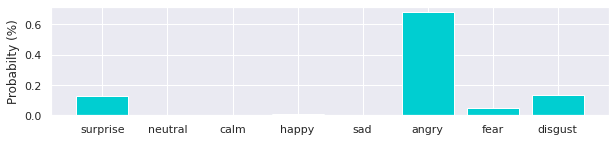

max emotion: angry




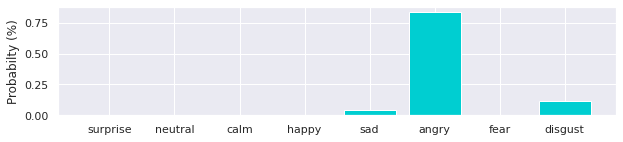

max emotion: angry




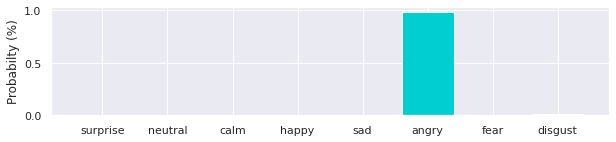

max emotion: angry




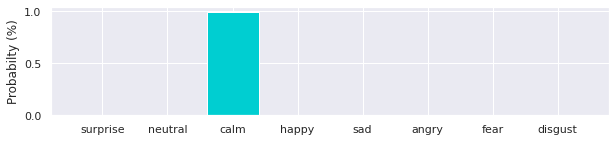

max emotion: calm




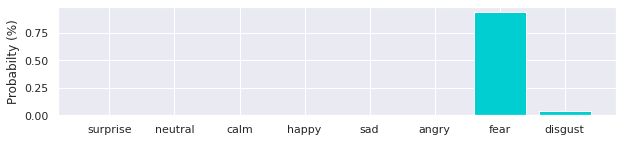

max emotion: fear




In [20]:
import pyaudio
import wave
from array import array
import struct
import time

audio = get_audio()
x = preprocess(audio) 
predictions = model.predict(x, use_multiprocessing=True)
for i in range(len(predictions)):
  pred_list = list(predictions[i])
  fig = plt.figure(figsize = (10, 2))
  plt.bar(emo_list, pred_list, color = 'darkturquoise')
  plt.ylabel("Probabilty (%)")
  plt.show()
      
  max_emo = np.argmax(pred_list)
  print('max emotion:', emotions.get(max_emo,-1))
  print()
  print()  
    